In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from keras import regularizers

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Lectura de datos e informacion relevante de estos
datos= pd.read_csv("roboBohr.csv")
datos.shape
datos.info()
datos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1278 entries, Unnamed: 0 to Eat
dtypes: float64(1276), int64(2)
memory usage: 158.4 MB


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
count,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,...,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000
mean,8139.041805,115.715266,22.445723,20.474191,18.529573,17.169350,15.816888,15.133152,14.471534,13.960759,...,0.000134,0.000133,0.003879,0.000131,0.000129,0.002155,0.000127,0.001201,33107.484300,-11.178969
std,4698.182820,113.198503,8.659586,7.670481,6.485777,5.512560,4.179691,3.885091,3.503075,3.357136,...,0.002728,0.002705,0.043869,0.002676,0.002633,0.032755,0.002594,0.024472,23456.785147,3.659133
min,0.000000,36.858105,2.906146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-23.245373
25%,4068.250000,73.516695,17.969345,16.228071,15.165862,13.744092,13.653146,13.637784,12.759519,12.587359,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12298.250000,-13.475805
50%,8142.500000,73.516695,20.662511,18.631287,17.690729,16.020040,15.156646,13.848274,13.659233,13.652832,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27731.500000,-10.835211
75%,12207.750000,73.516695,21.132432,20.739496,18.712895,18.297501,17.639688,16.154918,15.499474,14.900585,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55020.750000,-8.623903
max,16272.000000,388.023441,73.563510,66.269180,66.268891,66.268756,66.268196,66.264158,66.258487,66.258177,...,0.062225,0.061999,0.500000,0.061534,0.059760,0.500000,0.057834,0.500000,74980.000000,-0.789513


In [8]:
datos.drop(columns=['Unnamed: 0','pubchem_id'],axis=1,inplace=True)

total=len(datos)
df_train=datos[:int(0.6*total)]                       #60% de los datos
df_val=datos[int(0.6*total):int(0.85*total)]          #25% de los datos
df_test=datos[int(0.85*total)::]                      #15% restante

In [9]:
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
X_val_scaled =  pd.DataFrame(scaler.transform(df_val),columns=df_val.columns)
X_test_scaled =  pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)

y_train = df_train.pop('Eat').values.reshape(-1,1)
y_val = df_val.pop('Eat').values.reshape(-1,1)
y_test_scaled = df_test.pop('Eat').values.reshape(-1,1)

X_train_scaled.drop(columns=['Eat'],axis=1,inplace=True)
X_val_scaled.drop(columns=['Eat'],axis=1,inplace=True)
X_test_scaled.drop(columns=['Eat'],axis=1,inplace=True)

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 344us/step - loss: 1.5968 - val_loss: 0.6082
Epoch 2/250
9745/9745 [==============================] - 2s 241us/step - loss: 0.5960 - val_loss: 0.4966
Epoch 3/250
9745/9745 [==============================] - 3s 279us/step - loss: 0.5007 - val_loss: 0.3870
Epoch 4/250
9745/9745 [==============================] - 3s 267us/step - loss: 0.4156 - val_loss: 0.3272
Epoch 5/250
9745/9745 [==============================] - 2s 247us/step - loss: 0.3660 - val_loss: 0.2962
Epoch 6/250
9745/9745 [==============================] - 2s 246us/step - loss: 0.3129 - val_loss: 0.2546
Epoch 7/250
9745/9745 [==============================] - 2s 240us/step - loss: 0.2745 - val_loss: 0.2785
Epoch 8/250
9745/9745 [==============================] - 2s 243us/step - loss: 0.2558 - val_loss: 0.2654
Epoch 9/250
9745/9745 [==============================] - 3s 262us/step - loss: 0.2225 - val_loss: 0.1933
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 231us/step - loss: 0.0310 - val_loss: 0.0530
Epoch 79/250
9745/9745 [==============================] - 2s 251us/step - loss: 0.0312 - val_loss: 0.0593
Epoch 80/250
9745/9745 [==============================] - 3s 262us/step - loss: 0.0304 - val_loss: 0.0626
Epoch 81/250
9745/9745 [==============================] - 2s 238us/step - loss: 0.0303 - val_loss: 0.1001
Epoch 82/250
9745/9745 [==============================] - 2s 232us/step - loss: 0.0293 - val_loss: 0.0464
Epoch 83/250
9745/9745 [==============================] - 2s 232us/step - loss: 0.0289 - val_loss: 0.0671
Epoch 84/250
9745/9745 [==============================] - 2s 232us/step - loss: 0.0301 - val_loss: 0.0451
Epoch 85/250
9745/9745 [==============================] - 2s 232us/step - loss: 0.0292 - val_loss: 0.0435
Epoch 86/250
9745/9745 [==============================] - 3s 257us/step - loss: 0.0295 - val_loss: 0.0506
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 241us/step - loss: 0.0205 - val_loss: 0.0402
Epoch 156/250
9745/9745 [==============================] - 2s 231us/step - loss: 0.0208 - val_loss: 0.0497
Epoch 157/250
9745/9745 [==============================] - 2s 231us/step - loss: 0.0200 - val_loss: 0.0399
Epoch 158/250
9745/9745 [==============================] - 2s 232us/step - loss: 0.0201 - val_loss: 0.0427
Epoch 159/250
9745/9745 [==============================] - 2s 233us/step - loss: 0.0198 - val_loss: 0.0425
Epoch 160/250
9745/9745 [==============================] - 3s 258us/step - loss: 0.0196 - val_loss: 0.0396
Epoch 161/250
9745/9745 [==============================] - 3s 278us/step - loss: 0.0197 - val_loss: 0.0515
Epoch 162/250
9745/9745 [==============================] - 2s 238us/step - loss: 0.0202 - val_loss: 0.0416
Epoch 163/250
9745/9745 [==============================] - 2s 233us/step - loss: 0.0195 - val_loss: 0.0403
Epoch 164/250
9745/9745 [============

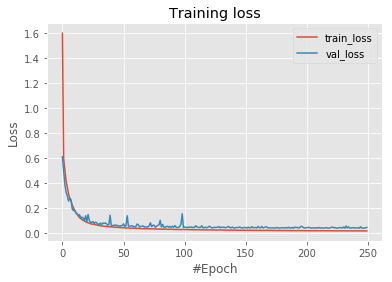

In [24]:
#b)
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,250), history.history["loss"], label="train_loss")
plt.plot(np.arange(0,250), history.history["val_loss"], label="val_loss")
plt.title("Training loss")
plt.xlabel("#Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 322us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 2s 234us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 2s 238us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 3s 267us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 3s 267us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 2s 235us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 2s 234us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 2s 234us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 2s 234us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 2s 

9745/9745 [==============================] - 2s 246us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 2s 232us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 2s 233us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 2s 232us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 2s 236us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 3s 258us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 3s 264us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 2s 233us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 2s 234us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 2s 234us/step - loss: nan - val_loss: nan
Epoc

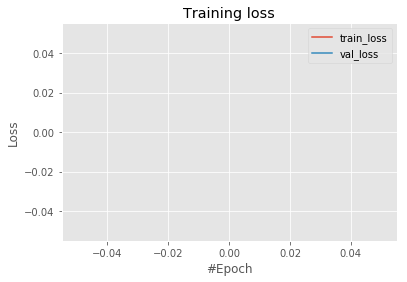

In [25]:
#c)
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,250), history.history["loss"], label="train_loss")
plt.plot(np.arange(0,250), history.history["val_loss"], label="val_loss")
plt.title("Training loss")
plt.xlabel("#Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

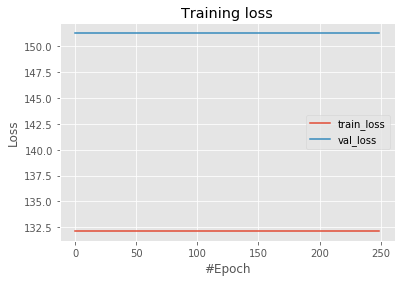

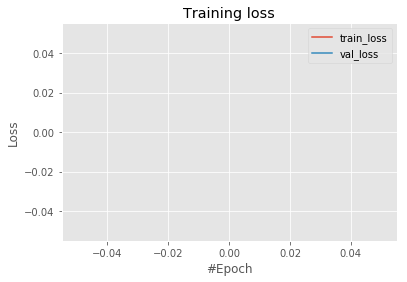

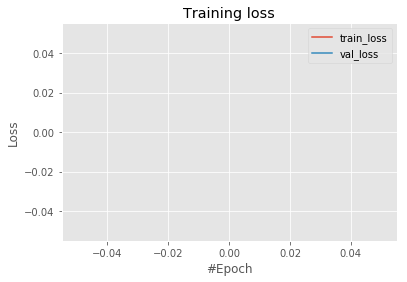

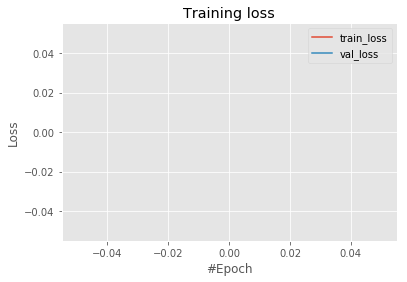

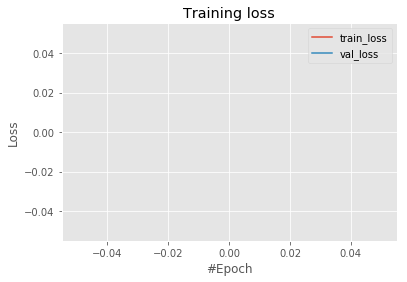

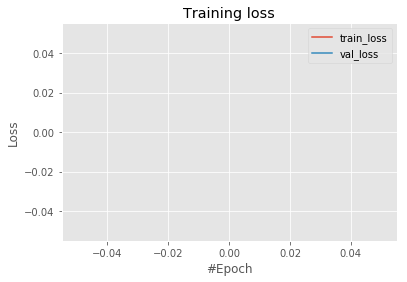

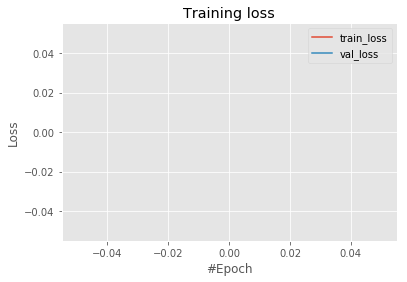

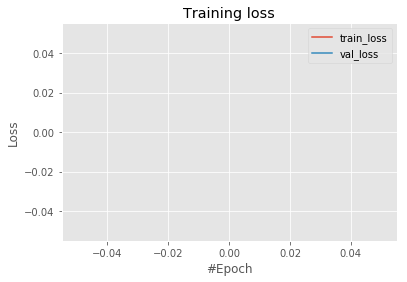

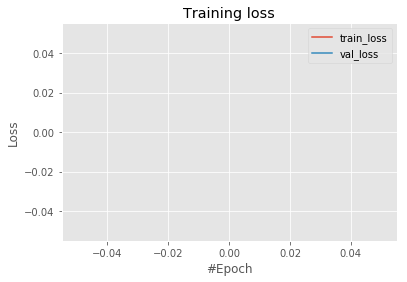

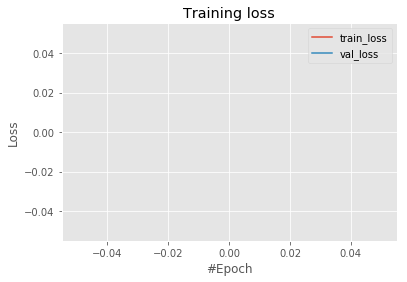

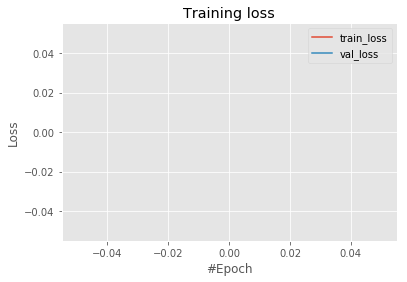

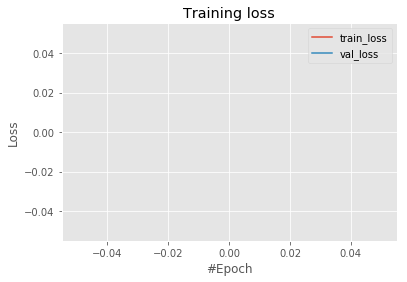

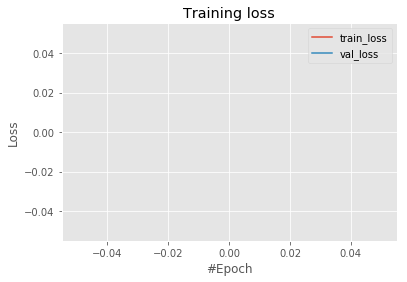

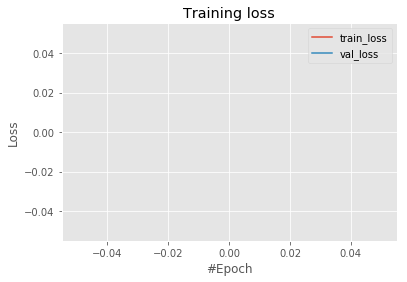

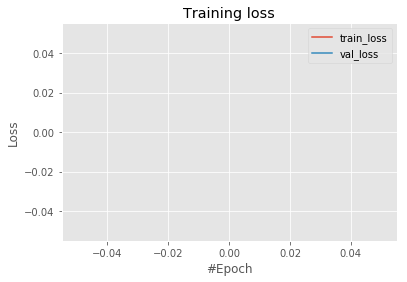

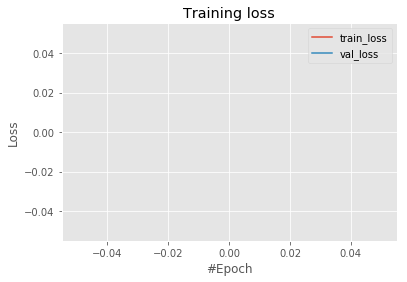

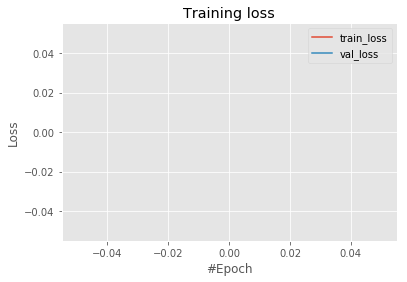

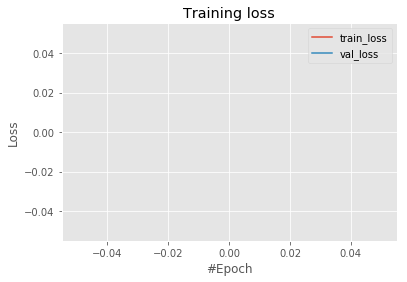

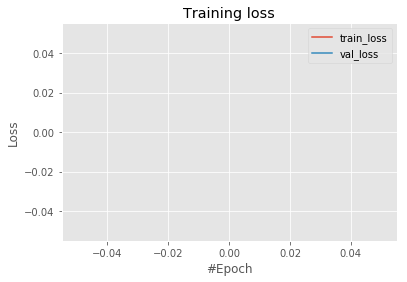

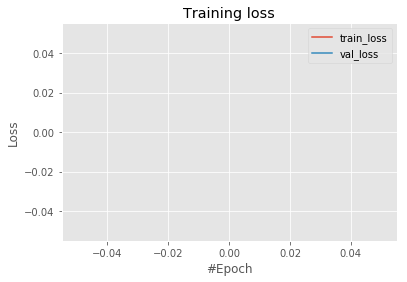

In [26]:
#d1)
n_lr = 20
lear_rate = np.linspace(0,1,n_lr)
for i in range(n_lr):
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lear_rate[i]),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=250, verbose=0, validation_data=(X_val_scaled, y_val))
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,250), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0,250), history.history["val_loss"], label="val_loss")
    plt.title("Training loss")
    plt.xlabel("#Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

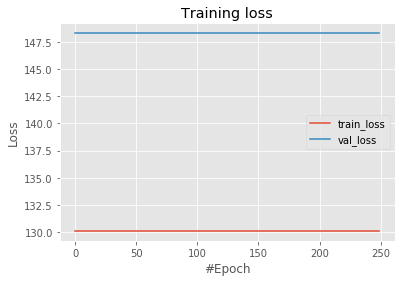

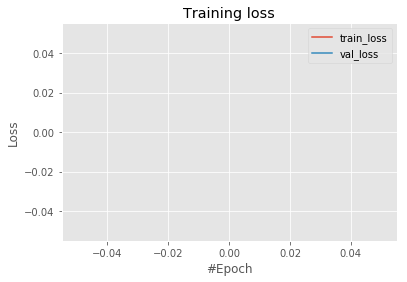

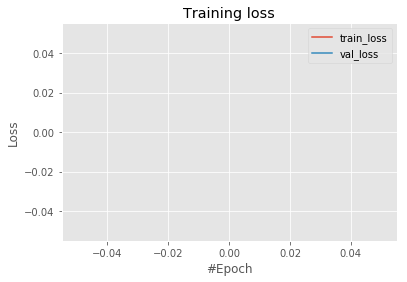

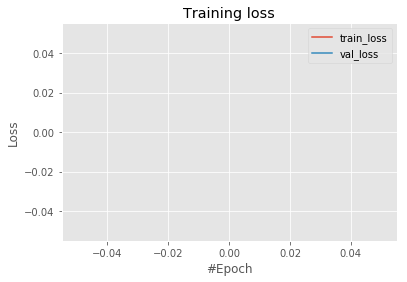

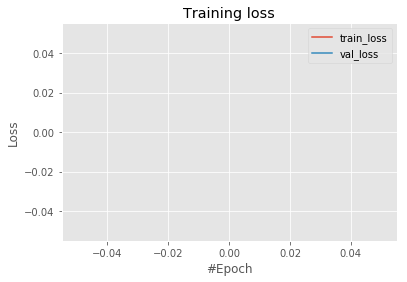

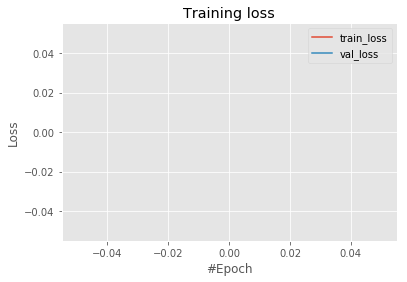

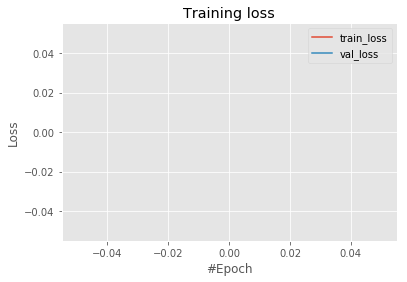

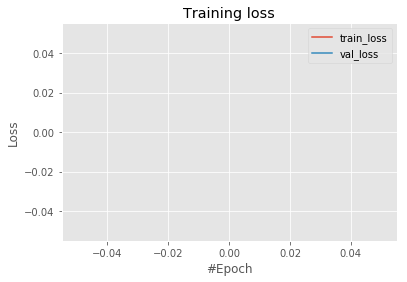

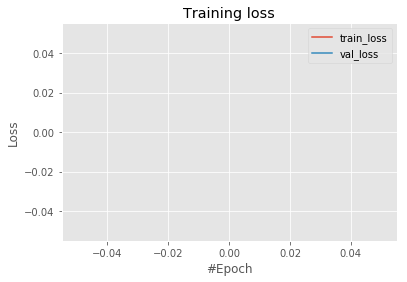

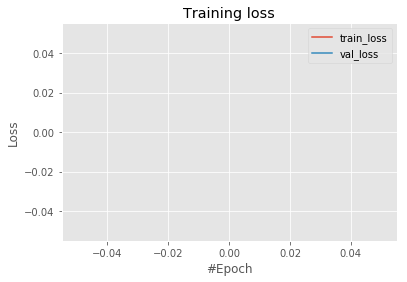

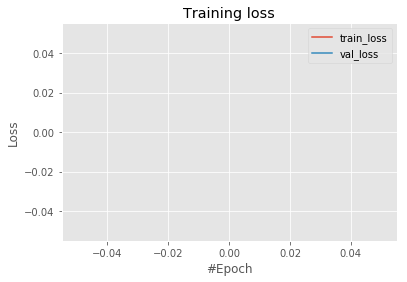

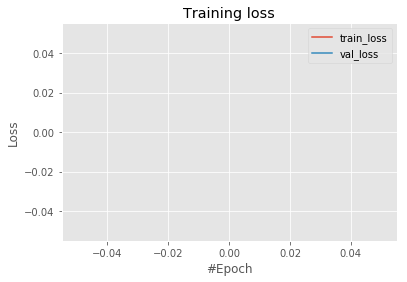

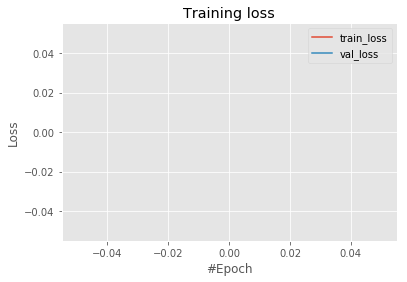

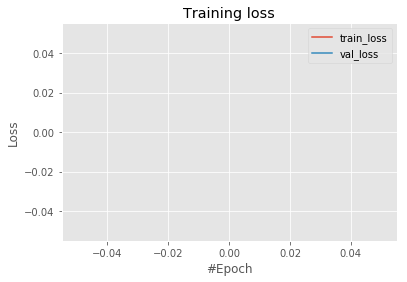

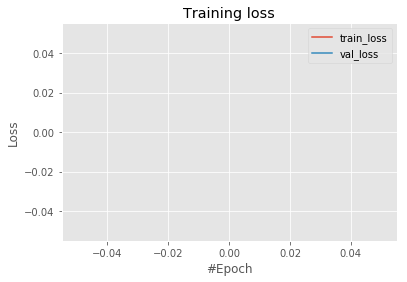

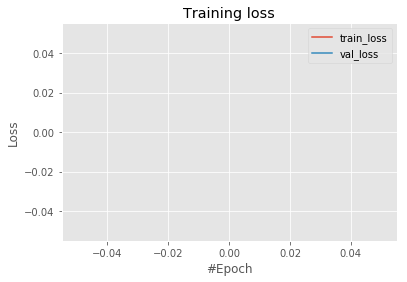

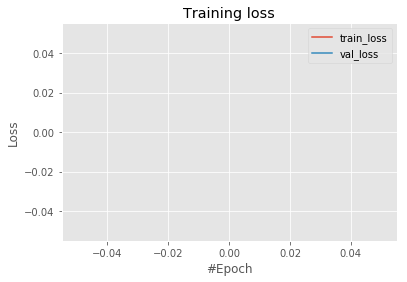

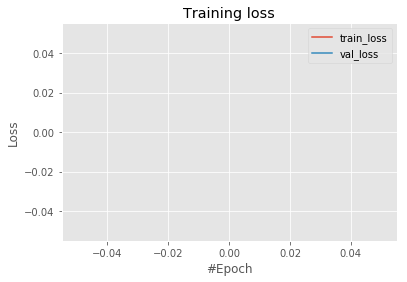

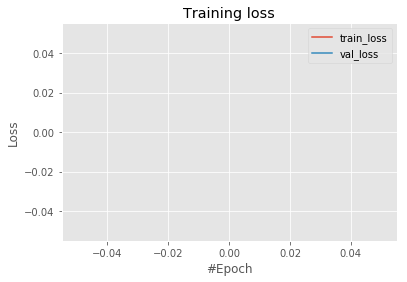

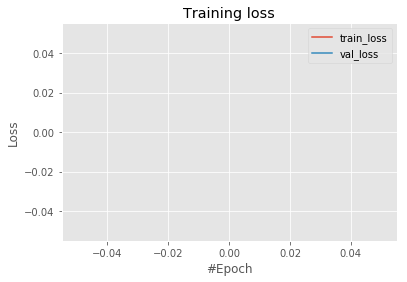

In [27]:
#d2)
n_lr = 20
lear_rate = np.linspace(0,1,n_lr)
for i in range(n_lr):
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lear_rate[i]),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=250, verbose=0, validation_data=(X_val_scaled, y_val))
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,250), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0,250), history.history["val_loss"], label="val_loss")
    plt.title("Training loss")
    plt.xlabel("#Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 447us/step - loss: 4108578071.6896 - val_loss: 119543260.1852
Epoch 2/250
9745/9745 [==============================] - 3s 274us/step - loss: 87109665.7864 - val_loss: 83822548.6424
Epoch 3/250
9745/9745 [==============================] - 3s 275us/step - loss: 68303887.5062 - val_loss: 76982767.2473
Epoch 4/250
9745/9745 [==============================] - 3s 318us/step - loss: 66657374.0979 - val_loss: 71902274.4946
Epoch 5/250
9745/9745 [==============================] - 3s 303us/step - loss: 60629248.3267 - val_loss: 65520713.7695
Epoch 6/250
9745/9745 [==============================] - 3s 276us/step - loss: 57026989.3981 - val_loss: 61630772.1340
Epoch 7/250
9745/9745 [==============================] - 3s 279us/step - loss: 54903578.9562 - val_loss: 61321993.2887
Epoch 8/250
9745/9745 [==============================] - 3s 275us/step - loss: 53453838.4813 - val_loss: 59090038.53

Epoch 69/250
9745/9745 [==============================] - 3s 262us/step - loss: 36917786.5958 - val_loss: 42199949.3360
Epoch 70/250
9745/9745 [==============================] - 3s 261us/step - loss: 36841826.0876 - val_loss: 42096893.4660
Epoch 71/250
9745/9745 [==============================] - 3s 286us/step - loss: 36769909.2335 - val_loss: 42027761.0995
Epoch 72/250
9745/9745 [==============================] - 3s 286us/step - loss: 36691252.9625 - val_loss: 41888022.5261
Epoch 73/250
9745/9745 [==============================] - 3s 262us/step - loss: 36606025.3703 - val_loss: 41789077.1192
Epoch 74/250
9745/9745 [==============================] - 3s 263us/step - loss: 36621939.6651 - val_loss: 41664993.7655
Epoch 75/250
9745/9745 [==============================] - 3s 266us/step - loss: 36538965.1111 - val_loss: 41584902.5300
Epoch 76/250
9745/9745 [==============================] - 3s 264us/step - loss: 36475574.4623 - val_loss: 41463815.9842
Epoch 77/250
9745/9745 [================

Epoch 137/250
9745/9745 [==============================] - 3s 287us/step - loss: 33496714.8101 - val_loss: 38326982.3941
Epoch 138/250
9745/9745 [==============================] - 3s 283us/step - loss: 33466890.7054 - val_loss: 38289791.8818
Epoch 139/250
9745/9745 [==============================] - 3s 260us/step - loss: 33429426.5995 - val_loss: 38228113.5704
Epoch 140/250
9745/9745 [==============================] - 3s 261us/step - loss: 33409055.1709 - val_loss: 38190098.9379
Epoch 141/250
9745/9745 [==============================] - 3s 261us/step - loss: 33365557.5736 - val_loss: 38153462.9734
Epoch 142/250
9745/9745 [==============================] - 3s 261us/step - loss: 33327358.4349 - val_loss: 38121169.9803
Epoch 143/250
9745/9745 [==============================] - 3s 285us/step - loss: 33300516.7826 - val_loss: 38094877.0877
Epoch 144/250
9745/9745 [==============================] - 3s 287us/step - loss: 33273000.2435 - val_loss: 38085599.7458
Epoch 145/250
9745/9745 [=======

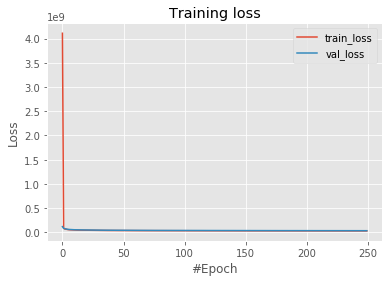

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 486us/step - loss: 182037991914536.4062 - val_loss: 399707259315.8306
Epoch 2/250
9745/9745 [==============================] - 3s 262us/step - loss: 298082955635.1409 - val_loss: 296286867799.0148
Epoch 3/250
9745/9745 [==============================] - 3s 262us/step - loss: 248736860570.0203 - val_loss: 274318093670.1478
Epoch 4/250
9745/9745 [==============================] - 3s 262us/step - loss: 242035783512.0829 - val_loss: 266672240169.8680
Epoch 5/250
9745/9745 [==============================] - 3s 263us/step - loss: 225838949758.3844 - val_loss: 254215440773.4227
Epoch 6/250
9745/9745 [==============================] - 3s 282us/step - loss: 216975303845.5002 - val_loss: 246636384921.8522
Epoch 7/250
9745/9745 [==============================] - 3s 292us/step - loss: 210763759547.0678 - val_loss: 240743300732.5951
Epoch 8/250
9745/9745 [==============================] - 3s 

Epoch 128/250
9745/9745 [==============================] - 3s 261us/step - loss: 164005930890.9414 - val_loss: 197512640978.0966
Epoch 129/250
9745/9745 [==============================] - 3s 261us/step - loss: 163864457658.5950 - val_loss: 197342898073.0956
Epoch 130/250
9745/9745 [==============================] - 3s 261us/step - loss: 163723910767.0165 - val_loss: 197174940798.1084
Epoch 131/250
9745/9745 [==============================] - 3s 294us/step - loss: 163585668878.1069 - val_loss: 197009046131.5153
Epoch 132/250
9745/9745 [==============================] - 3s 283us/step - loss: 163448887840.1018 - val_loss: 196844201784.2443
Epoch 133/250
9745/9745 [==============================] - 3s 263us/step - loss: 163312325344.3973 - val_loss: 196681727693.3044
Epoch 134/250
9745/9745 [==============================] - 3s 262us/step - loss: 163178581094.2424 - val_loss: 196520235157.3123
Epoch 135/250
9745/9745 [==============================] - 3s 262us/step - loss: 163045379056.553

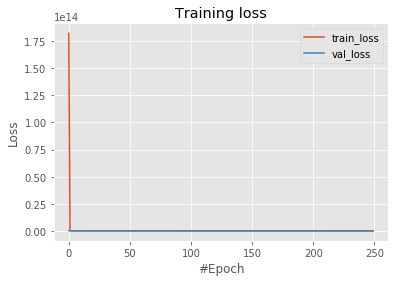

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 433us/step - loss: 78166599764.8879 - val_loss: 1323471725.9034
Epoch 2/250
9745/9745 [==============================] - 3s 269us/step - loss: 1141520299.8838 - val_loss: 1061904006.6207
Epoch 3/250
9745/9745 [==============================] - 3s 270us/step - loss: 910204145.4334 - val_loss: 1061323863.1409
Epoch 4/250
9745/9745 [==============================] - 3s 282us/step - loss: 885422963.2985 - val_loss: 900110073.5685
Epoch 5/250
9745/9745 [==============================] - 3s 306us/step - loss: 819997834.7608 - val_loss: 870676628.8709
Epoch 6/250
9745/9745 [==============================] - 3s 272us/step - loss: 794541111.8465 - val_loss: 834539533.1153
Epoch 7/250
9745/9745 [==============================] - 3s 270us/step - loss: 755099756.3895 - val_loss: 805899421.9507
Epoch 8/250
9745/9745 [==============================] - 3s 271us/step - loss: 730876846.6159 - val

Epoch 68/250
9745/9745 [==============================] - 3s 287us/step - loss: 519917291.3749 - val_loss: 566908235.6650
Epoch 69/250
9745/9745 [==============================] - 3s 305us/step - loss: 518485213.4617 - val_loss: 565874598.1163
Epoch 70/250
9745/9745 [==============================] - 3s 269us/step - loss: 517616364.4716 - val_loss: 563993645.9665
Epoch 71/250
9745/9745 [==============================] - 3s 264us/step - loss: 516637241.5048 - val_loss: 563995418.9557
Epoch 72/250
9745/9745 [==============================] - 3s 265us/step - loss: 515988563.2821 - val_loss: 563992893.0049
Epoch 73/250
9745/9745 [==============================] - 3s 266us/step - loss: 515613228.0185 - val_loss: 563658227.9882
Epoch 74/250
9745/9745 [==============================] - 3s 282us/step - loss: 514851762.2871 - val_loss: 562013632.1576
Epoch 75/250
9745/9745 [==============================] - 3s 295us/step - loss: 513497993.3652 - val_loss: 560928526.2818
Epoch 76/250
9745/9745 [

Epoch 135/250
9745/9745 [==============================] - 3s 267us/step - loss: 480271268.7581 - val_loss: 525334156.0433
Epoch 136/250
9745/9745 [==============================] - 3s 270us/step - loss: 479559099.1926 - val_loss: 524846339.3103
Epoch 137/250
9745/9745 [==============================] - 3s 268us/step - loss: 479090863.0165 - val_loss: 524163770.6719
Epoch 138/250
9745/9745 [==============================] - 3s 271us/step - loss: 478732336.0312 - val_loss: 523486344.4177
Epoch 139/250
9745/9745 [==============================] - 3s 301us/step - loss: 478008561.8274 - val_loss: 523417091.3103
Epoch 140/250
9745/9745 [==============================] - 3s 290us/step - loss: 477592203.1713 - val_loss: 522989391.2906
Epoch 141/250
9745/9745 [==============================] - 3s 269us/step - loss: 477255301.4247 - val_loss: 522620749.9350
Epoch 142/250
9745/9745 [==============================] - 3s 270us/step - loss: 476899627.1877 - val_loss: 522178283.3813
Epoch 143/250
97

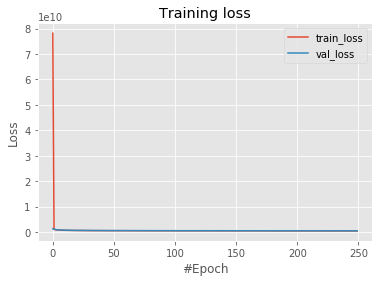

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 438us/step - loss: 2426117085.0237 - val_loss: 17298036.7626
Epoch 2/250
9745/9745 [==============================] - 3s 266us/step - loss: 14570601.6639 - val_loss: 15016337.1143
Epoch 3/250
9745/9745 [==============================] - 3s 273us/step - loss: 13576263.3311 - val_loss: 15598016.5389
Epoch 4/250
9745/9745 [==============================] - 3s 272us/step - loss: 12860363.4095 - val_loss: 14271672.1379
Epoch 5/250
9745/9745 [==============================] - 3s 293us/step - loss: 11574325.1154 - val_loss: 12668079.3251
Epoch 6/250
9745/9745 [==============================] - 3s 293us/step - loss: 10491161.5159 - val_loss: 11632489.4571
Epoch 7/250
9745/9745 [==============================] - 3s 269us/step - loss: 9736844.5196 - val_loss: 11063876.8167
Epoch 8/250
9745/9745 [==============================] - 3s 269us/step - loss: 9435924.9286 - val_loss: 10751226.5468


Epoch 70/250
9745/9745 [==============================] - 3s 298us/step - loss: 7135513.8509 - val_loss: 8136221.8980
Epoch 71/250
9745/9745 [==============================] - 3s 274us/step - loss: 7130548.5544 - val_loss: 8124761.8946
Epoch 72/250
9745/9745 [==============================] - 3s 267us/step - loss: 7121540.7650 - val_loss: 8152151.6419
Epoch 73/250
9745/9745 [==============================] - 3s 266us/step - loss: 7107412.8369 - val_loss: 8114919.5813
Epoch 74/250
9745/9745 [==============================] - 3s 267us/step - loss: 7105283.3194 - val_loss: 8098538.4054
Epoch 75/250
9745/9745 [==============================] - 3s 277us/step - loss: 7092027.9665 - val_loss: 8102706.8581
Epoch 76/250
9745/9745 [==============================] - 3s 302us/step - loss: 7080456.2914 - val_loss: 8086823.7089
Epoch 77/250
9745/9745 [==============================] - 3s 275us/step - loss: 7072683.2177 - val_loss: 8067795.2739
Epoch 78/250
9745/9745 [==============================] 

9745/9745 [==============================] - 3s 267us/step - loss: 6751363.3305 - val_loss: 7683815.7429
Epoch 140/250
9745/9745 [==============================] - 3s 299us/step - loss: 6744637.1879 - val_loss: 7690168.0665
Epoch 141/250
9745/9745 [==============================] - 3s 281us/step - loss: 6740617.8510 - val_loss: 7684593.5020
Epoch 142/250
9745/9745 [==============================] - 3s 273us/step - loss: 6738446.6647 - val_loss: 7671443.2744
Epoch 143/250
9745/9745 [==============================] - 3s 268us/step - loss: 6737413.0391 - val_loss: 7665796.6961
Epoch 144/250
9745/9745 [==============================] - 3s 268us/step - loss: 6734737.7867 - val_loss: 7659738.5783
Epoch 145/250
9745/9745 [==============================] - 3s 268us/step - loss: 6730717.1055 - val_loss: 7659045.9355
Epoch 146/250
9745/9745 [==============================] - 3s 303us/step - loss: 6727382.1617 - val_loss: 7654731.6941
Epoch 147/250
9745/9745 [==============================] - 3s 

Epoch 208/250
9745/9745 [==============================] - 3s 267us/step - loss: 6556945.3917 - val_loss: 7467847.5468
Epoch 209/250
9745/9745 [==============================] - 3s 266us/step - loss: 6554835.7807 - val_loss: 7465707.0074
Epoch 210/250
9745/9745 [==============================] - 3s 287us/step - loss: 6552500.8649 - val_loss: 7463094.7099
Epoch 211/250
9745/9745 [==============================] - 3s 294us/step - loss: 6550419.6696 - val_loss: 7460215.2271
Epoch 212/250
9745/9745 [==============================] - 3s 267us/step - loss: 6548612.2666 - val_loss: 7457440.4833
Epoch 213/250
9745/9745 [==============================] - 3s 267us/step - loss: 6546262.8538 - val_loss: 7452983.6330
Epoch 214/250
9745/9745 [==============================] - 3s 271us/step - loss: 6544221.1732 - val_loss: 7452337.9335
Epoch 215/250
9745/9745 [==============================] - 3s 269us/step - loss: 6541999.2359 - val_loss: 7450071.7340
Epoch 216/250
9745/9745 [=======================

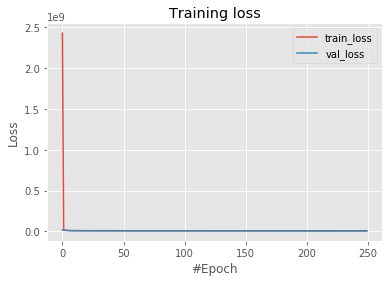

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 465us/step - loss: 6440489983.4925 - val_loss: 28561848.5281
Epoch 2/250
9745/9745 [==============================] - 3s 281us/step - loss: 22472721.6521 - val_loss: 22581977.1547
Epoch 3/250
9745/9745 [==============================] - 3s 265us/step - loss: 19506093.2456 - val_loss: 18295326.1833
Epoch 4/250
9745/9745 [==============================] - 3s 264us/step - loss: 16781309.7083 - val_loss: 16996285.1094
Epoch 5/250
9745/9745 [==============================] - 3s 265us/step - loss: 15943974.1121 - val_loss: 16352559.1468
Epoch 6/250
9745/9745 [==============================] - 3s 265us/step - loss: 15360688.1720 - val_loss: 15586170.5872
Epoch 7/250
9745/9745 [==============================] - 3s 307us/step - loss: 14780604.9256 - val_loss: 15270146.6759
Epoch 8/250
9745/9745 [==============================] - 3s 282us/step - loss: 14390708.3035 - val_loss: 14811629.984

Epoch 69/250
9745/9745 [==============================] - 3s 263us/step - loss: 11427285.4043 - val_loss: 11936075.9921
Epoch 70/250
9745/9745 [==============================] - 3s 263us/step - loss: 11416643.9276 - val_loss: 11925963.7300
Epoch 71/250
9745/9745 [==============================] - 3s 263us/step - loss: 11402024.0705 - val_loss: 11913000.8256
Epoch 72/250
9745/9745 [==============================] - 3s 294us/step - loss: 11391793.1198 - val_loss: 11900514.9714
Epoch 73/250
9745/9745 [==============================] - 3s 283us/step - loss: 11377948.0395 - val_loss: 11892077.2749
Epoch 74/250
9745/9745 [==============================] - 3s 264us/step - loss: 11367996.4540 - val_loss: 11882372.9123
Epoch 75/250
9745/9745 [==============================] - 3s 264us/step - loss: 11354623.3827 - val_loss: 11874865.2118
Epoch 76/250
9745/9745 [==============================] - 3s 265us/step - loss: 11341339.8120 - val_loss: 11856575.5704
Epoch 77/250
9745/9745 [================

Epoch 137/250
9745/9745 [==============================] - 3s 280us/step - loss: 10877086.8552 - val_loss: 11374601.1074
Epoch 138/250
9745/9745 [==============================] - 3s 290us/step - loss: 10871671.8334 - val_loss: 11368374.4394
Epoch 139/250
9745/9745 [==============================] - 3s 264us/step - loss: 10866278.6292 - val_loss: 11362330.8020
Epoch 140/250
9745/9745 [==============================] - 3s 263us/step - loss: 10860876.8121 - val_loss: 11357578.7744
Epoch 141/250
9745/9745 [==============================] - 3s 269us/step - loss: 10855605.6845 - val_loss: 11350880.4138
Epoch 142/250
9745/9745 [==============================] - 3s 266us/step - loss: 10850368.3741 - val_loss: 11346272.5498
Epoch 143/250
9745/9745 [==============================] - 3s 282us/step - loss: 10845127.1230 - val_loss: 11341933.7675
Epoch 144/250
9745/9745 [==============================] - 3s 291us/step - loss: 10839977.5922 - val_loss: 11335251.3576
Epoch 145/250
9745/9745 [=======

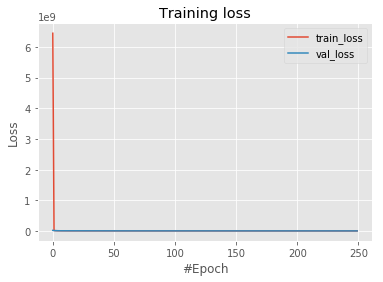

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 461us/step - loss: 550966749993.2073 - val_loss: 5679414380.9576
Epoch 2/250
9745/9745 [==============================] - 3s 279us/step - loss: 4632774337.6090 - val_loss: 4482319552.1892
Epoch 3/250
9745/9745 [==============================] - 3s 262us/step - loss: 4149803709.4584 - val_loss: 4284495420.5320
Epoch 4/250
9745/9745 [==============================] - 3s 264us/step - loss: 3920804930.2001 - val_loss: 4128866926.4709
Epoch 5/250
9745/9745 [==============================] - 3s 265us/step - loss: 3778223754.7838 - val_loss: 4023166357.0601
Epoch 6/250
9745/9745 [==============================] - 3s 272us/step - loss: 3854391098.6344 - val_loss: 4422457836.3271
Epoch 7/250
9745/9745 [==============================] - 3s 296us/step - loss: 3945018994.4316 - val_loss: 4085968571.6493
Epoch 8/250
9745/9745 [==============================] - 3s 283us/step - loss: 3687999235

Epoch 67/250
9745/9745 [==============================] - 3s 286us/step - loss: 2808750811.7344 - val_loss: 3090436744.4493
Epoch 68/250
9745/9745 [==============================] - 3s 263us/step - loss: 2804593748.5102 - val_loss: 3086373741.7143
Epoch 69/250
9745/9745 [==============================] - 3s 265us/step - loss: 2800534183.2866 - val_loss: 3082370260.8709
Epoch 70/250
9745/9745 [==============================] - 3s 265us/step - loss: 2796527985.5122 - val_loss: 3078461881.6315
Epoch 71/250
9745/9745 [==============================] - 3s 264us/step - loss: 2792605320.7610 - val_loss: 3074583691.9803
Epoch 72/250
9745/9745 [==============================] - 3s 284us/step - loss: 2788765439.5797 - val_loss: 3070761275.0187
Epoch 73/250
9745/9745 [==============================] - 3s 298us/step - loss: 2784955872.4761 - val_loss: 3067034946.0808
Epoch 74/250
9745/9745 [==============================] - 3s 266us/step - loss: 2781266145.4744 - val_loss: 3063315545.5369
Epoch 75

Epoch 133/250
9745/9745 [==============================] - 3s 279us/step - loss: 2631173862.8072 - val_loss: 2913498218.9399
Epoch 134/250
9745/9745 [==============================] - 3s 263us/step - loss: 2629379455.0937 - val_loss: 2911681695.9054
Epoch 135/250
9745/9745 [==============================] - 3s 264us/step - loss: 2627592520.1634 - val_loss: 2909903657.8680
Epoch 136/250
9745/9745 [==============================] - 3s 263us/step - loss: 2625829433.2158 - val_loss: 2908123489.1034
Epoch 137/250
9745/9745 [==============================] - 3s 264us/step - loss: 2624076535.9089 - val_loss: 2906369376.5990
Epoch 138/250
9745/9745 [==============================] - 3s 294us/step - loss: 2622342181.0931 - val_loss: 2904627651.2158
Epoch 139/250
9745/9745 [==============================] - 3s 279us/step - loss: 2620626583.2620 - val_loss: 2902906010.8611
Epoch 140/250
9745/9745 [==============================] - 3s 265us/step - loss: 2618922378.6524 - val_loss: 2901159667.6414


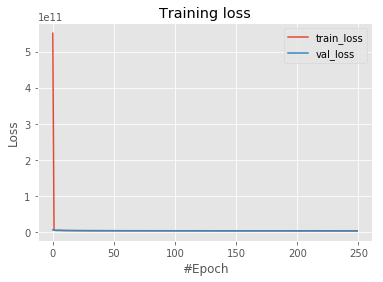

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 468us/step - loss: 3171346234.0480 - val_loss: 19940750.8493
Epoch 2/250
9745/9745 [==============================] - 3s 262us/step - loss: 17774790.9928 - val_loss: 18137843.6138
Epoch 3/250
9745/9745 [==============================] - 3s 258us/step - loss: 16518310.2330 - val_loss: 16244540.8493
Epoch 4/250
9745/9745 [==============================] - 2s 256us/step - loss: 15279908.8087 - val_loss: 15996745.2650
Epoch 5/250
9745/9745 [==============================] - 2s 256us/step - loss: 15606122.6528 - val_loss: 16006298.7291
Epoch 6/250
9745/9745 [==============================] - 3s 281us/step - loss: 14936757.4495 - val_loss: 15560973.9980
Epoch 7/250
9745/9745 [==============================] - 3s 313us/step - loss: 14592092.6461 - val_loss: 14968525.9626
Epoch 8/250
9745/9745 [==============================] - 3s 274us/step - loss: 14203742.8330 - val_loss: 14826001.978

Epoch 69/250
9745/9745 [==============================] - 2s 256us/step - loss: 11874597.8954 - val_loss: 12582081.9567
Epoch 70/250
9745/9745 [==============================] - 2s 256us/step - loss: 11859846.3443 - val_loss: 12569339.3498
Epoch 71/250
9745/9745 [==============================] - 3s 257us/step - loss: 11844214.0950 - val_loss: 12564395.5724
Epoch 72/250
9745/9745 [==============================] - 3s 257us/step - loss: 11837262.3441 - val_loss: 12555137.4719
Epoch 73/250
9745/9745 [==============================] - 3s 279us/step - loss: 11833628.4021 - val_loss: 12551255.4286
Epoch 74/250
9745/9745 [==============================] - 3s 286us/step - loss: 11822287.7127 - val_loss: 12545982.8847
Epoch 75/250
9745/9745 [==============================] - 3s 257us/step - loss: 11815624.6104 - val_loss: 12533519.1724
Epoch 76/250
9745/9745 [==============================] - 3s 257us/step - loss: 11815413.2360 - val_loss: 12527127.0207
Epoch 77/250
9745/9745 [================

Epoch 137/250
9745/9745 [==============================] - 2s 255us/step - loss: 11515749.7861 - val_loss: 12237927.2788
Epoch 138/250
9745/9745 [==============================] - 2s 256us/step - loss: 11509484.2619 - val_loss: 12236801.3596
Epoch 139/250
9745/9745 [==============================] - 2s 256us/step - loss: 11505175.5385 - val_loss: 12240279.6867
Epoch 140/250
9745/9745 [==============================] - 3s 272us/step - loss: 11504339.1462 - val_loss: 12237209.8424
Epoch 141/250
9745/9745 [==============================] - 3s 287us/step - loss: 11500596.7383 - val_loss: 12233759.7714
Epoch 142/250
9745/9745 [==============================] - 3s 261us/step - loss: 11493139.9449 - val_loss: 12229470.3567
Epoch 143/250
9745/9745 [==============================] - 3s 257us/step - loss: 11490929.6309 - val_loss: 12227539.7399
Epoch 144/250
9745/9745 [==============================] - 2s 257us/step - loss: 11487195.9154 - val_loss: 12223978.5635
Epoch 145/250
9745/9745 [=======

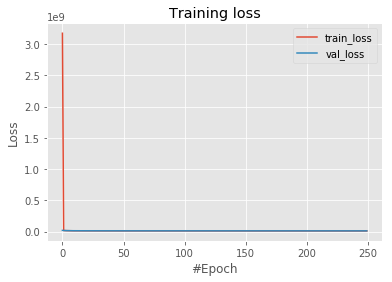

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 464us/step - loss: 21756989067.0056 - val_loss: 381129893.6433
Epoch 2/250
9745/9745 [==============================] - 3s 283us/step - loss: 270542663.5592 - val_loss: 247845752.5911
Epoch 3/250
9745/9745 [==============================] - 3s 261us/step - loss: 233523200.7520 - val_loss: 226457952.2522
Epoch 4/250
9745/9745 [==============================] - 3s 261us/step - loss: 221166275.2213 - val_loss: 215552522.9557
Epoch 5/250
9745/9745 [==============================] - 3s 260us/step - loss: 215107471.6174 - val_loss: 213168312.1655
Epoch 6/250
9745/9745 [==============================] - 3s 271us/step - loss: 207581838.2366 - val_loss: 202755804.6108
Epoch 7/250
9745/9745 [==============================] - 3s 323us/step - loss: 205049759.7176 - val_loss: 201604953.0010
Epoch 8/250
9745/9745 [==============================] - 3s 337us/step - loss: 201577721.4260 - val_los

Epoch 68/250
9745/9745 [==============================] - 3s 261us/step - loss: 162362950.6200 - val_loss: 161611240.6700
Epoch 69/250
9745/9745 [==============================] - 3s 261us/step - loss: 162162762.8158 - val_loss: 161421855.9369
Epoch 70/250
9745/9745 [==============================] - 3s 267us/step - loss: 161966066.8634 - val_loss: 161234897.9862
Epoch 71/250
9745/9745 [==============================] - 3s 294us/step - loss: 161772403.8297 - val_loss: 161051472.4571
Epoch 72/250
9745/9745 [==============================] - 3s 272us/step - loss: 161581753.1977 - val_loss: 160871543.2985
Epoch 73/250
9745/9745 [==============================] - 3s 262us/step - loss: 161394149.6562 - val_loss: 160695012.9813
Epoch 74/250
9745/9745 [==============================] - 3s 263us/step - loss: 161209395.0966 - val_loss: 160521127.2985
Epoch 75/250
9745/9745 [==============================] - 3s 262us/step - loss: 161026642.0507 - val_loss: 160350369.8601
Epoch 76/250
9745/9745 [

Epoch 135/250
9745/9745 [==============================] - 3s 260us/step - loss: 153440115.1951 - val_loss: 153287307.0502
Epoch 136/250
9745/9745 [==============================] - 3s 268us/step - loss: 153350064.0378 - val_loss: 153203103.6532
Epoch 137/250
9745/9745 [==============================] - 3s 292us/step - loss: 153260161.3233 - val_loss: 153119893.8483
Epoch 138/250
9745/9745 [==============================] - 3s 272us/step - loss: 153171334.3245 - val_loss: 153036992.5675
Epoch 139/250
9745/9745 [==============================] - 3s 262us/step - loss: 153083537.2864 - val_loss: 152955205.8325
Epoch 140/250
9745/9745 [==============================] - 3s 262us/step - loss: 152996508.0727 - val_loss: 152873820.8000
Epoch 141/250
9745/9745 [==============================] - 3s 263us/step - loss: 152909590.2284 - val_loss: 152793585.7970
Epoch 142/250
9745/9745 [==============================] - 3s 264us/step - loss: 152824150.0224 - val_loss: 152713417.3005
Epoch 143/250
97

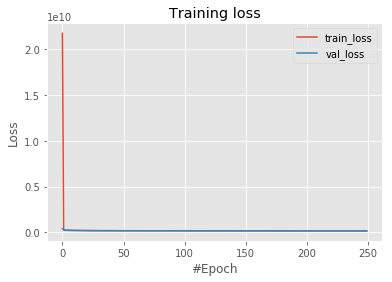

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 461us/step - loss: 1052261132.7235 - val_loss: 5006249.7266
Epoch 2/250
9745/9745 [==============================] - 3s 272us/step - loss: 4577947.6489 - val_loss: 4318824.0567
Epoch 3/250
9745/9745 [==============================] - 3s 270us/step - loss: 3804876.3159 - val_loss: 3741983.6884
Epoch 4/250
9745/9745 [==============================] - 3s 295us/step - loss: 3448722.4013 - val_loss: 3441649.9951
Epoch 5/250
9745/9745 [==============================] - 3s 302us/step - loss: 3240768.1700 - val_loss: 3253700.0007
Epoch 6/250
9745/9745 [==============================] - 3s 270us/step - loss: 3091997.0588 - val_loss: 3078494.1101
Epoch 7/250
9745/9745 [==============================] - 3s 271us/step - loss: 2931352.1662 - val_loss: 2964271.7187
Epoch 8/250
9745/9745 [==============================] - 3s 271us/step - loss: 2819225.3869 - val_loss: 2884951.6751
Epoch 9/250
9

9745/9745 [==============================] - 3s 269us/step - loss: 1927743.0441 - val_loss: 2128297.2608
Epoch 71/250
9745/9745 [==============================] - 3s 269us/step - loss: 1925197.3642 - val_loss: 2125191.5517
Epoch 72/250
9745/9745 [==============================] - 3s 269us/step - loss: 1923039.2103 - val_loss: 2125120.0643
Epoch 73/250
9745/9745 [==============================] - 3s 270us/step - loss: 1919986.0879 - val_loss: 2120528.6330
Epoch 74/250
9745/9745 [==============================] - 3s 300us/step - loss: 1918190.5129 - val_loss: 2119790.1140
Epoch 75/250
9745/9745 [==============================] - 3s 291us/step - loss: 1915921.9358 - val_loss: 2118893.2732
Epoch 76/250
9745/9745 [==============================] - 3s 270us/step - loss: 1913582.5597 - val_loss: 2116013.9042
Epoch 77/250
9745/9745 [==============================] - 3s 271us/step - loss: 1911237.1570 - val_loss: 2111946.6103
Epoch 78/250
9745/9745 [==============================] - 3s 270us/st

Epoch 208/250
9745/9745 [==============================] - 3s 304us/step - loss: 1764715.6572 - val_loss: 1978015.0032
Epoch 209/250
9745/9745 [==============================] - 3s 285us/step - loss: 1764533.9229 - val_loss: 1977080.7118
Epoch 210/250
9745/9745 [==============================] - 3s 270us/step - loss: 1764095.3669 - val_loss: 1976596.4877
Epoch 211/250
9745/9745 [==============================] - 3s 270us/step - loss: 1763650.0317 - val_loss: 1975986.8089
Epoch 212/250
9745/9745 [==============================] - 3s 269us/step - loss: 1762882.4779 - val_loss: 1975200.7219
Epoch 213/250
9745/9745 [==============================] - 3s 277us/step - loss: 1761999.8739 - val_loss: 1974824.1298
Epoch 214/250
9745/9745 [==============================] - 3s 302us/step - loss: 1761267.3039 - val_loss: 1973593.0517
Epoch 215/250
9745/9745 [==============================] - 3s 280us/step - loss: 1760293.1307 - val_loss: 1972878.0495
Epoch 216/250
9745/9745 [=======================

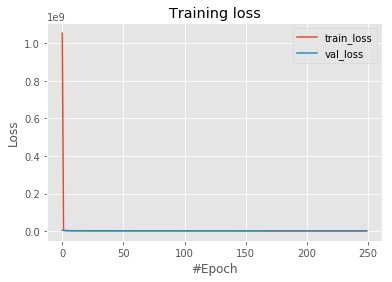

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 445us/step - loss: 646.6853 - val_loss: 122.9668
Epoch 2/250
9745/9745 [==============================] - 3s 266us/step - loss: 113.5518 - val_loss: 115.5487
Epoch 3/250
9745/9745 [==============================] - 3s 268us/step - loss: 108.2835 - val_loss: 111.5258
Epoch 4/250
9745/9745 [==============================] - 3s 297us/step - loss: 105.0476 - val_loss: 108.7804
Epoch 5/250
9745/9745 [==============================] - 3s 284us/step - loss: 102.7303 - val_loss: 106.7260
Epoch 6/250
9745/9745 [==============================] - 3s 266us/step - loss: 100.9353 - val_loss: 105.0833
Epoch 7/250
9745/9745 [==============================] - 3s 267us/step - loss: 99.4715 - val_loss: 103.7178
Epoch 8/250
9745/9745 [==============================] - 3s 267us/step - loss: 98.2398 - val_loss: 102.5565
Epoch 9/250
9745/9745 [==============================] - 3s 267us/step - loss: 97.

9745/9745 [==============================] - 3s 298us/step - loss: 76.5090 - val_loss: 80.9837
Epoch 152/250
9745/9745 [==============================] - 3s 282us/step - loss: 76.4685 - val_loss: 80.9427
Epoch 153/250
9745/9745 [==============================] - 3s 266us/step - loss: 76.4283 - val_loss: 80.9020
Epoch 154/250
9745/9745 [==============================] - 3s 265us/step - loss: 76.3884 - val_loss: 80.8616
Epoch 155/250
9745/9745 [==============================] - 3s 266us/step - loss: 76.3488 - val_loss: 80.8215
Epoch 156/250
9745/9745 [==============================] - 3s 267us/step - loss: 76.3095 - val_loss: 80.7817
Epoch 157/250
9745/9745 [==============================] - 3s 296us/step - loss: 76.2705 - val_loss: 80.7422
Epoch 158/250
9745/9745 [==============================] - 3s 283us/step - loss: 76.2317 - val_loss: 80.7029
Epoch 159/250
9745/9745 [==============================] - 3s 268us/step - loss: 76.1932 - val_loss: 80.6639
Epoch 160/250
9745/9745 [========

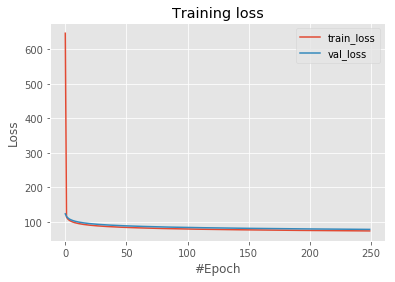

In [29]:
#e1)
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
sgd = SGD(lr=0.2, decay=1e-6)
for i in range(n_decay):
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=0.2, decay=10**lear_decay[i]),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,250), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0,250), history.history["val_loss"], label="val_loss")
    plt.title("Training loss")
    plt.xlabel("#Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 498us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 3s 268us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 3s 266us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 3s 265us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 3s 266us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 3s 277us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 3s 301us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 3s 280us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 3s 268us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 3s 

9745/9745 [==============================] - 3s 259us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 3s 258us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 3s 267us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 3s 286us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 3s 285us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 3s 261us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 3s 263us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 3s 261us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 3s 261us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 3s 285us/step - loss: nan - val_loss: nan
Epoc

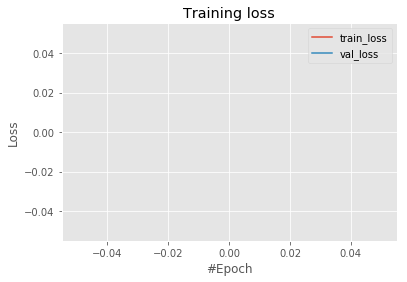

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 485us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 3s 276us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 3s 308us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 3s 320us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 3s 286us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 3s 277us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 3s 278us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 3s 276us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 3s 305us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 3s 

9745/9745 [==============================] - 3s 265us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 3s 288us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 3s 289us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 3s 266us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 3s 265us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 3s 266us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 3s 267us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 3s 290us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 3s 289us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 3s 266us/step - loss: nan - val_loss: nan
Epoc

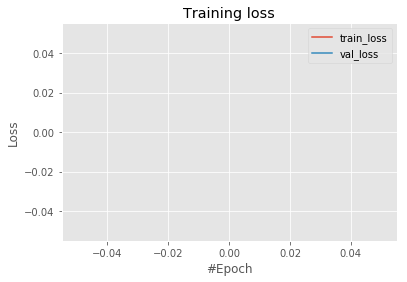

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 449us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 3s 297us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 3s 284us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 3s 268us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 3s 268us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 3s 267us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 3s 268us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 3s 299us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 3s 285us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 3s 

9745/9745 [==============================] - 3s 266us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 3s 272us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 3s 268us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 3s 300us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 3s 282us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 3s 267us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 3s 271us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 3s 269us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 3s 268us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 3s 300us/step - loss: nan - val_loss: nan
Epoc

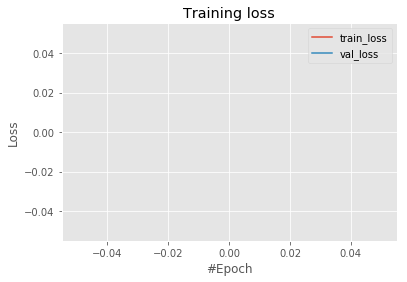

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 452us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 3s 269us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 3s 299us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 3s 304us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 3s 271us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 3s 272us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 3s 272us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 3s 273us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 3s 306us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 3s 

9745/9745 [==============================] - 3s 265us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 3s 265us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 3s 266us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 3s 265us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 3s 296us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 3s 281us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 3s 267us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 3s 267us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 3s 266us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 3s 266us/step - loss: nan - val_loss: nan
Epoc

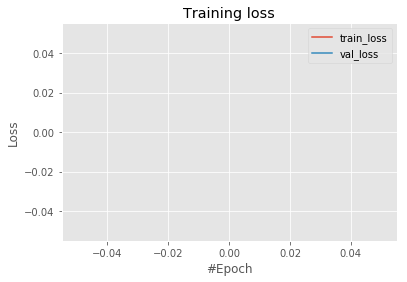

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 454us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 3s 269us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 3s 270us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 3s 288us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 3s 297us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 3s 271us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 3s 270us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 3s 270us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 3s 272us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 3s 

9745/9745 [==============================] - 3s 269us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 3s 268us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 3s 268us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 3s 268us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 3s 303us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 3s 284us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 3s 271us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 3s 304us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 3s 281us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 3s 293us/step - loss: nan - val_loss: nan
Epoc

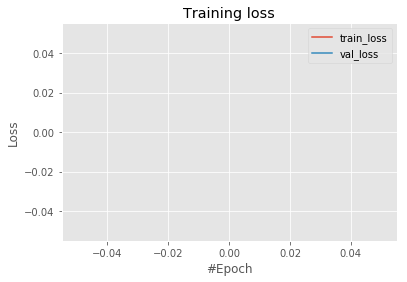

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 472us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 3s 306us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 3s 272us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 3s 272us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 3s 277us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 3s 272us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 3s 294us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 3s 299us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 3s 273us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 3s 

9745/9745 [==============================] - 3s 270us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 3s 273us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 3s 270us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 3s 298us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 3s 298us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 3s 272us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 3s 272us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 3s 272us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 3s 272us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 3s 298us/step - loss: nan - val_loss: nan
Epoc

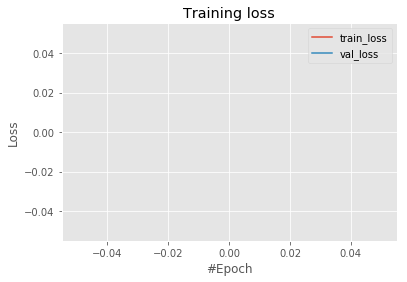

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 4s 456us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 3s 303us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 3s 290us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 3s 270us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 3s 272us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 3s 271us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 3s 278us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 3s 302us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 3s 283us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 3s 

9745/9745 [==============================] - 3s 290us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 3s 313us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 3s 269us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 3s 272us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 3s 270us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 3s 270us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 3s 294us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 3s 301us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 3s 271us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 3s 270us/step - loss: nan - val_loss: nan
Epoc

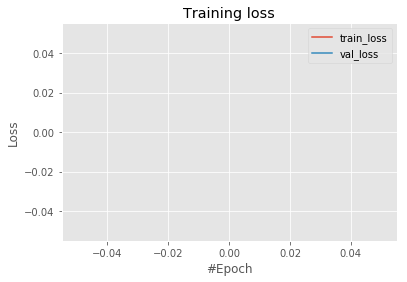

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 470us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 3s 273us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 3s 275us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 3s 274us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 3s 297us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 3s 305us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 3s 275us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 3s 275us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 3s 275us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 3s 

9745/9745 [==============================] - 3s 271us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 3s 270us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 3s 280us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 3s 300us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 3s 276us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 3s 271us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 3s 271us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 3s 271us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 3s 288us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 3s 306us/step - loss: nan - val_loss: nan
Epoc

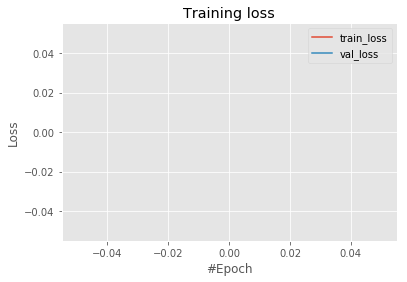

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 467us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 3s 298us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 3s 276us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 3s 267us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 3s 269us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 3s 266us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 3s 283us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 3s 297us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 3s 273us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 3s 

9745/9745 [==============================] - 3s 268us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 3s 266us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 3s 286us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 3s 295us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 3s 269us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 3s 267us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 3s 270us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 3s 268us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 3s 287us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 3s 294us/step - loss: nan - val_loss: nan
Epoc

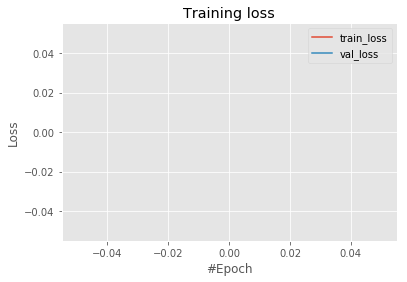

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 5s 470us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 3s 288us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 3s 295us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 3s 271us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 3s 271us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 3s 270us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 3s 269us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 3s 291us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 3s 307us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 3s 

9745/9745 [==============================] - 3s 297us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 3s 269us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 3s 274us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 3s 274us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 3s 270us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 3s 292us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 3s 292us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 3s 270us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 3s 271us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 3s 271us/step - loss: nan - val_loss: nan
Epoc

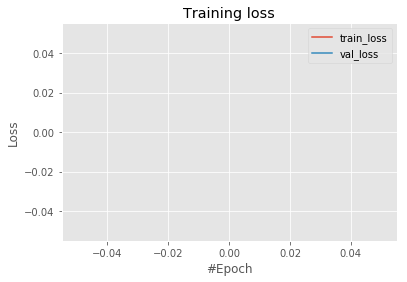

In [30]:
#e2)
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)
sgd = SGD(lr=0.2, decay=1e-6)
for i in range(n_decay):
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=0.2, decay=10**lear_decay[i]),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,250), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0,250), history.history["val_loss"], label="val_loss")
    plt.title("Training loss")
    plt.xlabel("#Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

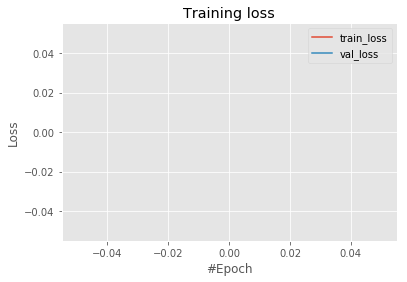

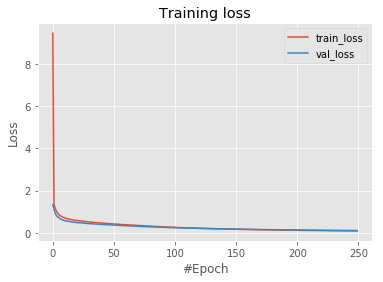

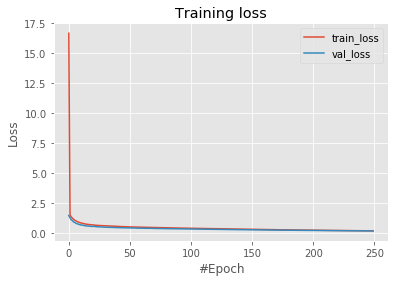

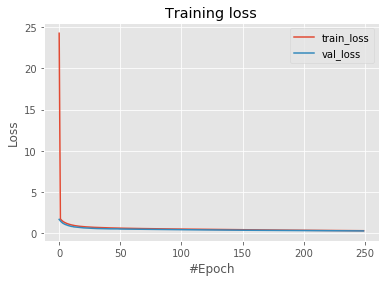

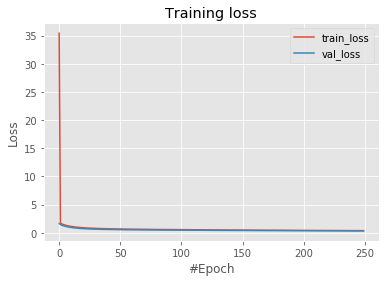

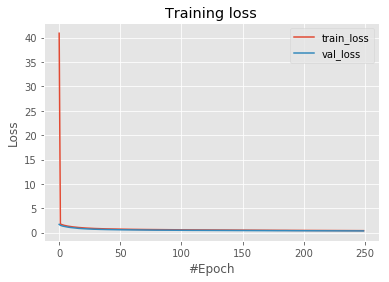

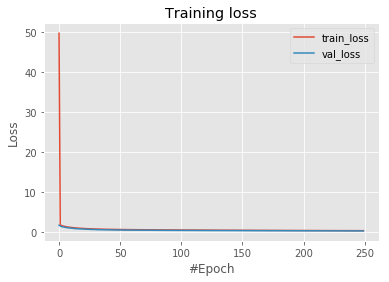

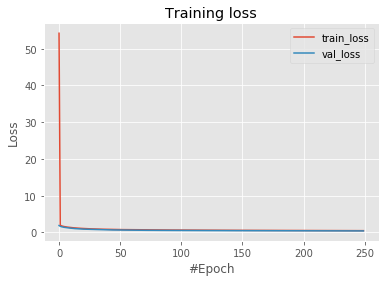

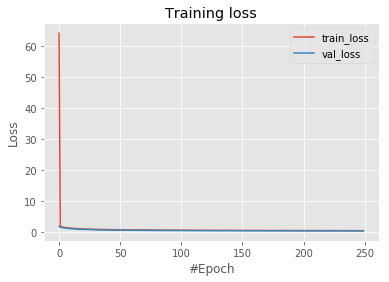

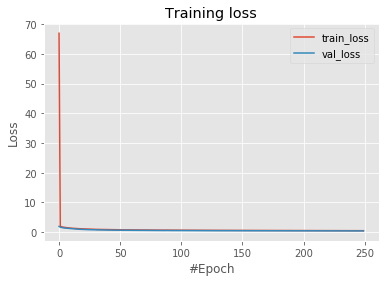

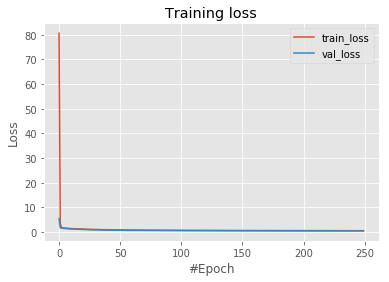

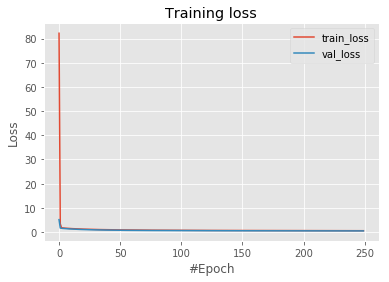

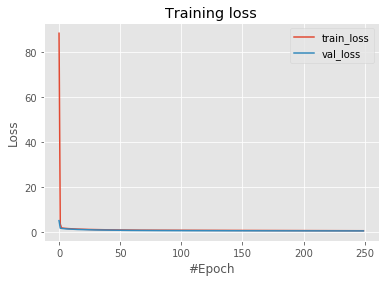

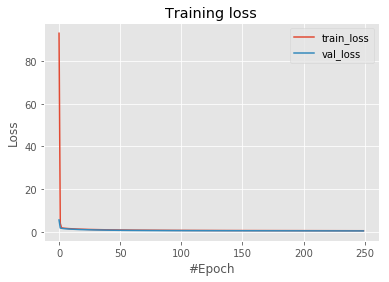

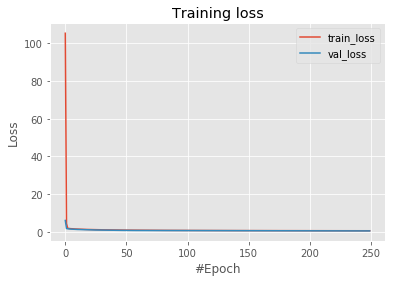

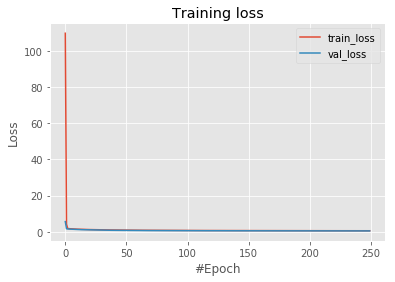

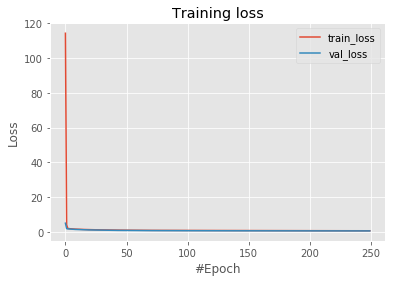

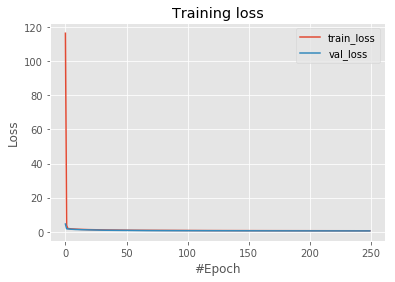

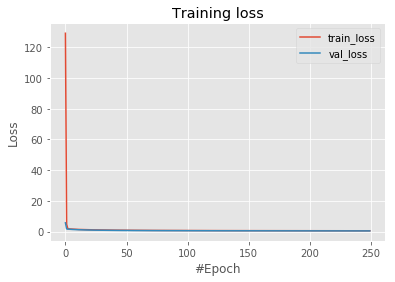

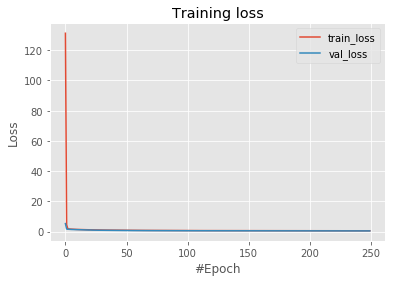

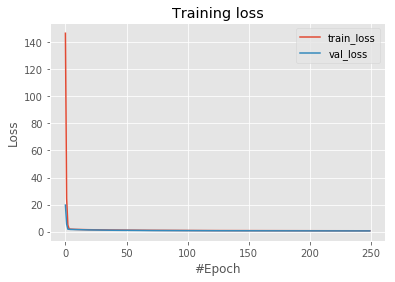

In [37]:
#f1
n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
for i in range(n_batches):
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
    history = model.fit(X_train_scaled,y_train,batch_size=int(batch_sizes[i]),epochs=250,verbose=0,validation_data=(X_val_scaled, y_val))
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,250), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0,250), history.history["val_loss"], label="val_loss")
    plt.title("Training loss")
    plt.xlabel("#Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    

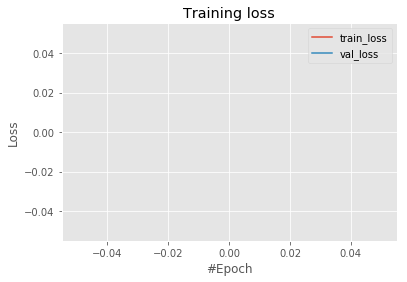

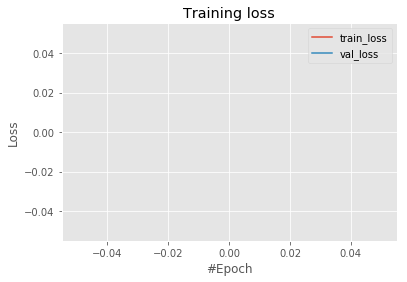

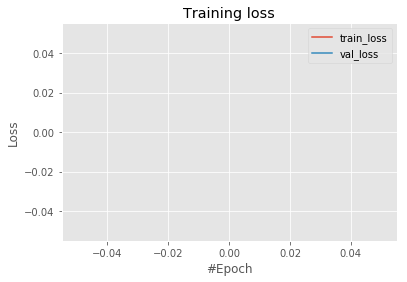

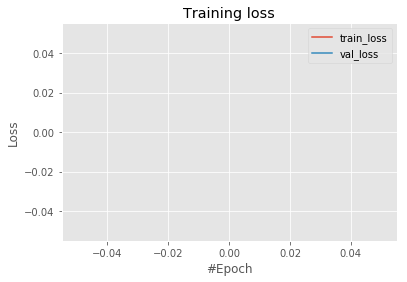

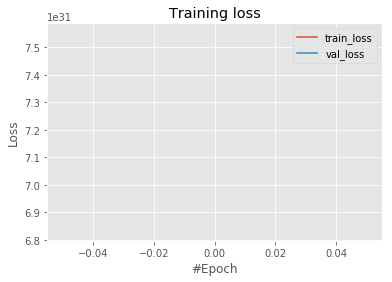

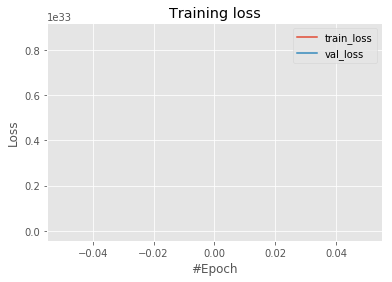

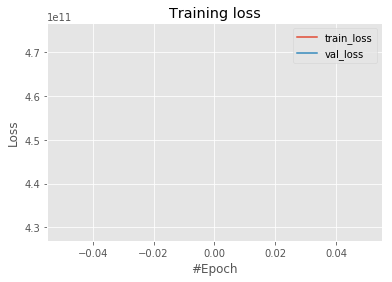

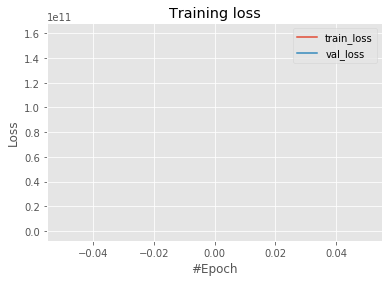

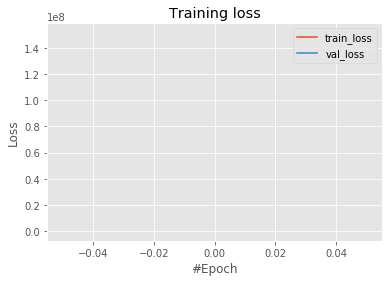

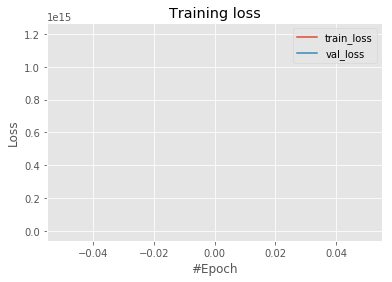

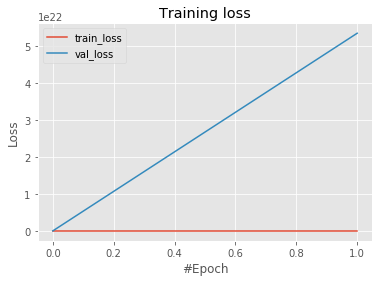

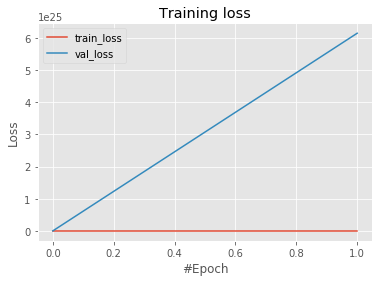

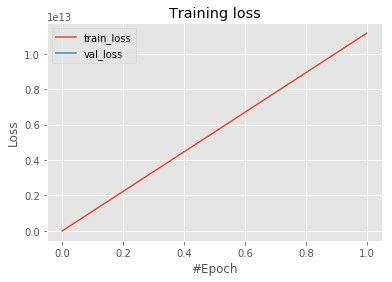

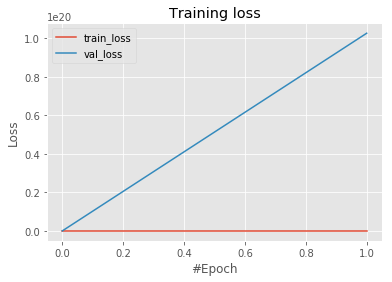

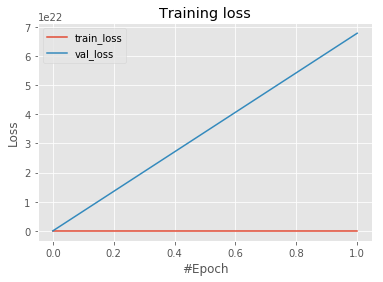

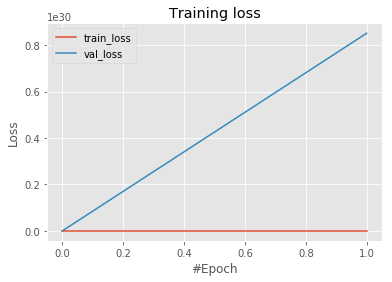

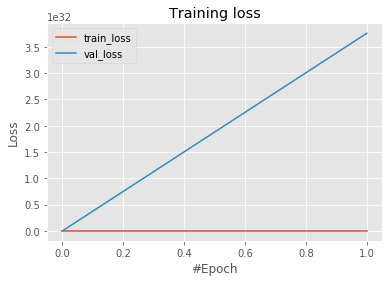

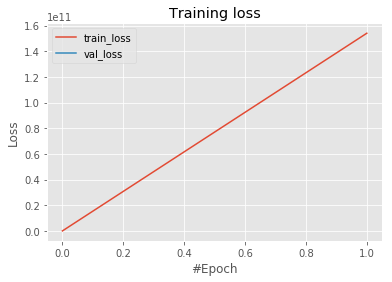

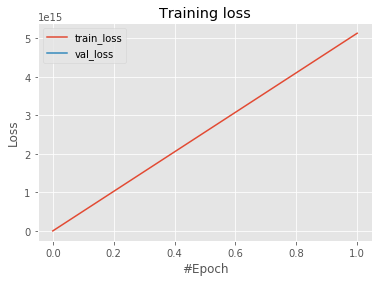

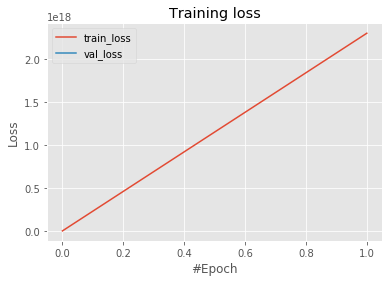

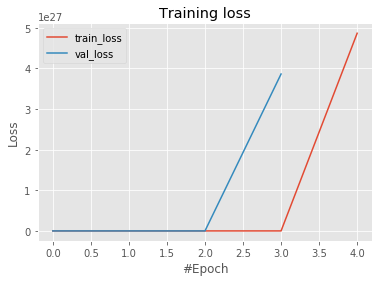

In [39]:
#f2
n_batches = 21
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
for i in range(n_batches):
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
    history = model.fit(X_train_scaled,y_train,batch_size=int(batch_sizes[i]),epochs=250,verbose=0,validation_data=(X_val_scaled, y_val))
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,250), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0,250), history.history["val_loss"], label="val_loss")
    plt.title("Training loss")
    plt.xlabel("#Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    

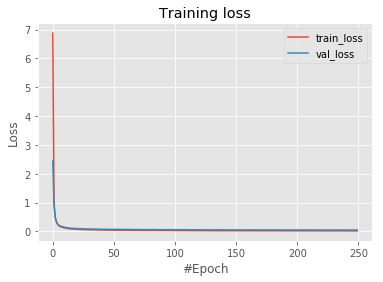

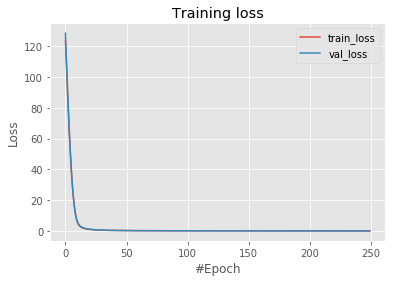

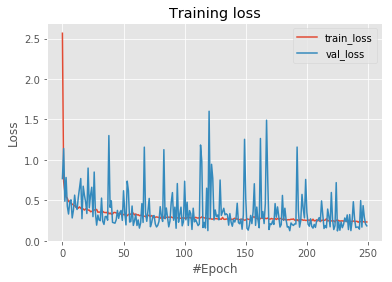

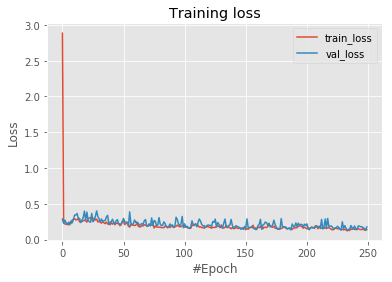

In [7]:
#g1
optimizadores =[Adagrad(lr=0.01), Adadelta(lr=0.01), RMSprop(lr=0.01), Adam(lr=0.01)]
for optimizador in optimizadores:
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=optimizador,loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=250, verbose=0, validation_data=(X_val_scaled, y_val))

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,250), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0,250), history.history["val_loss"], label="val_loss")
    plt.title("Training loss")
    plt.xlabel("#Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

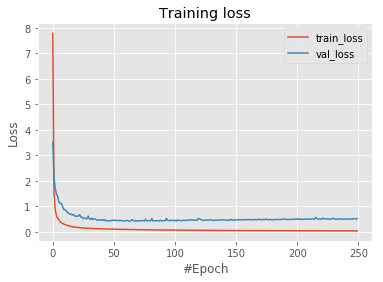

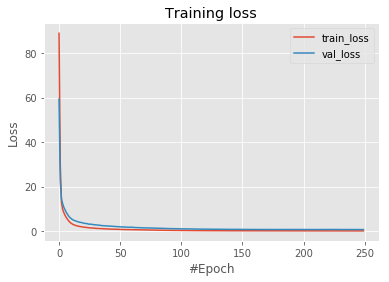

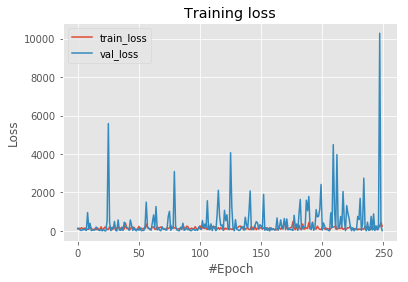

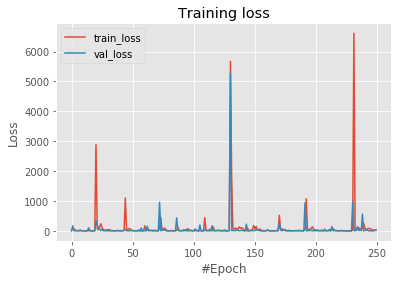

In [8]:
#g2
optimizadores =[Adagrad(lr=0.01), Adadelta(lr=0.01), RMSprop(lr=0.01), Adam(lr=0.01)]
for optimizador in optimizadores:
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=optimizador,loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=250, verbose=0, validation_data=(X_val_scaled, y_val))

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,250), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0,250), history.history["val_loss"], label="val_loss")
    plt.title("Training loss")
    plt.xlabel("#Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

C:\Users\Juan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=1275, kernel_regularizer=<keras.reg..., activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


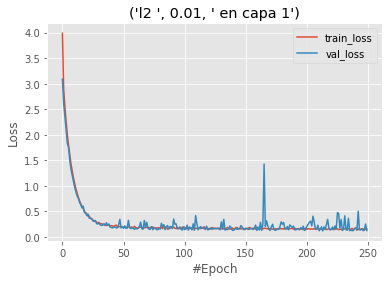

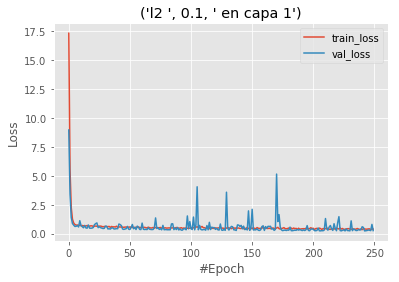

In [11]:
#h1
for i in [0.01,0.1]:
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',W_regularizer=regularizers.l2(i),activation="sigmoid"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=250, verbose=0, validation_data=(X_val_scaled, y_val))

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,250), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0,250), history.history["val_loss"], label="val_loss")
    plt.title(("l2 "i , " en capa 1"))
    plt.xlabel("#Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

C:\Users\Juan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_regularizer=<keras.reg..., activation="linear", kernel_initializer="uniform")`
  """


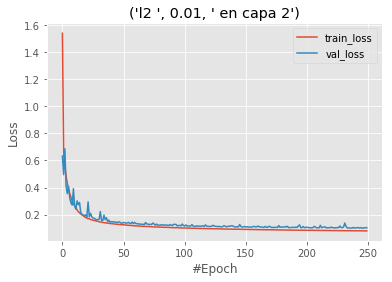

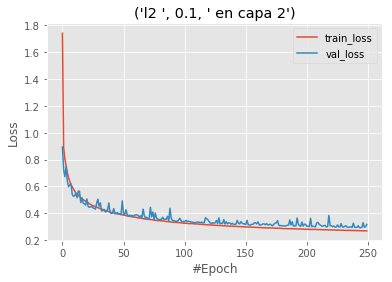

In [12]:
#h1
for i in [0.01,0.1]:
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
    model.add(Dense(1, kernel_initializer='uniform', W_regularizer=regularizers.l2(i),activation="linear")) 
    model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=250, verbose=0, validation_data=(X_val_scaled, y_val))

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,250), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0,250), history.history["val_loss"], label="val_loss")
    plt.title(("l2 ", i, " en capa 2"))
    plt.xlabel("#Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

C:\Users\Juan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="uniform", kernel_regularizer=<keras.reg..., activation="relu", input_dim=1275)`
  after removing the cwd from sys.path.


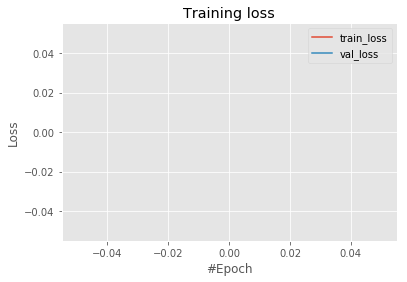

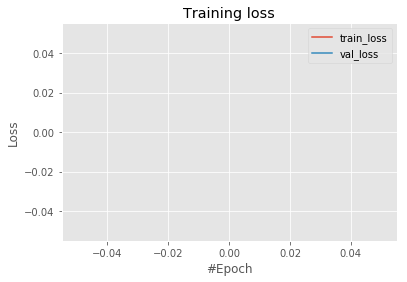

In [16]:
#h2
for i in [0.01,0.1]:
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',W_regularizer=regularizers.l2(i),activation="relu"))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=250, verbose=0, validation_data=(X_val_scaled, y_val))

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,250), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0,250), history.history["val_loss"], label="val_loss")
    plt.title("Training loss")
    plt.xlabel("#Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

C:\Users\Juan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="uniform", kernel_regularizer=<keras.reg..., activation="relu", input_dim=1275)`
  after removing the cwd from sys.path.
C:\Users\Juan\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", kernel_regularizer=<keras.reg..., activation="linear")`
  """


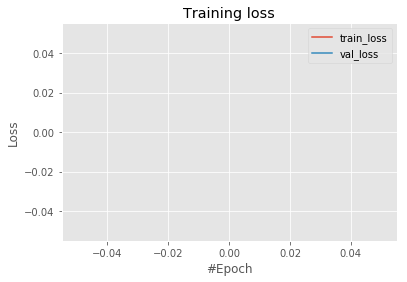

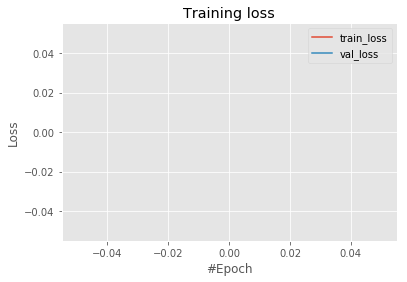

In [17]:
#h2
for i in [0.01,0.1]:
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
    model.add(Dense(1, kernel_initializer='uniform', W_regularizer=regularizers.l2(i),activation="linear")) 
    model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=250, verbose=0, validation_data=(X_val_scaled, y_val))

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,250), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0,250), history.history["val_loss"], label="val_loss")
    plt.title("Training loss")
    plt.xlabel("#Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

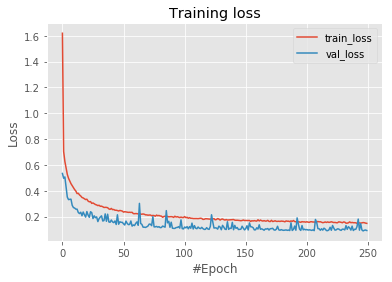

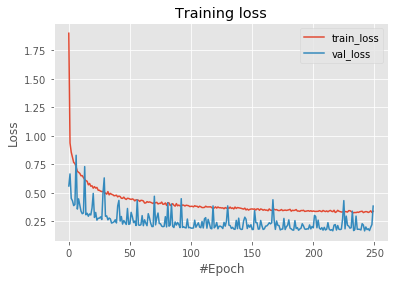

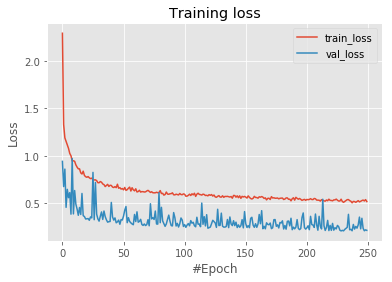

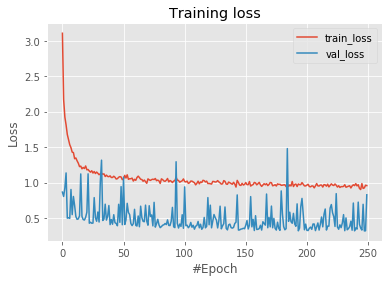

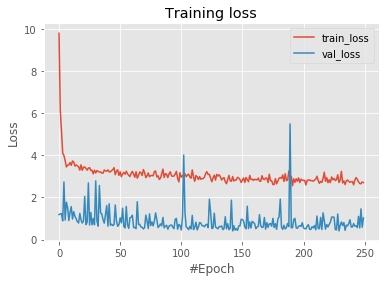

In [25]:
#i1
drop = [0.1, 0.3, 0.5, 0.7, 0.9]
for i in drop:
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
    model.add(Dropout(i))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(0.01),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=250, verbose=0, validation_data=(X_val_scaled, y_val))
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,250), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0,250), history.history["val_loss"], label="val_loss")
    plt.title("Training loss")
    plt.xlabel("#Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

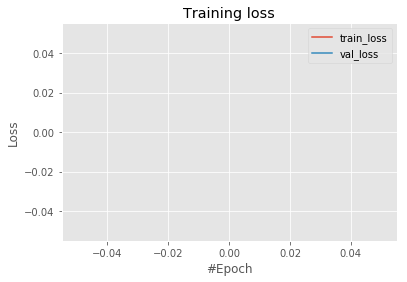

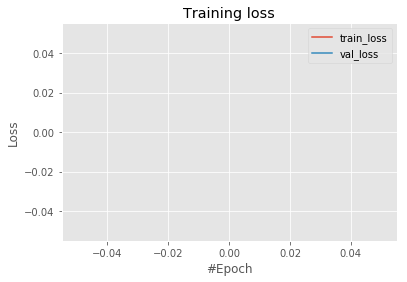

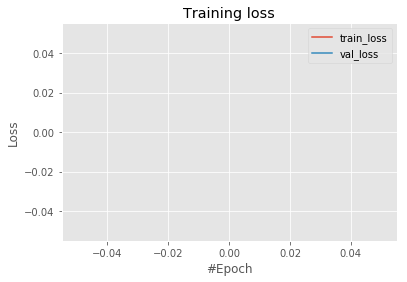

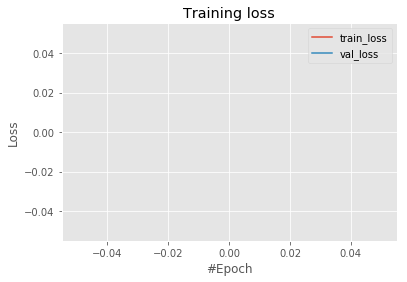

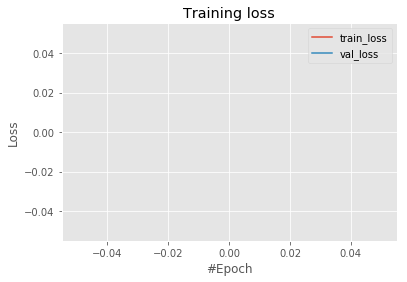

In [27]:
#i2
drop = [0.1, 0.3, 0.5, 0.7, 0.9]
for i in drop:
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
    model.add(Dropout(i))
    model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
    model.compile(optimizer=SGD(0.01),loss='mean_squared_error')
    history = model.fit(X_train_scaled, y_train, epochs=250, verbose=0, validation_data=(X_val_scaled, y_val))
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0,250), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0,250), history.history["val_loss"], label="val_loss")
    plt.title("Training loss")
    plt.xlabel("#Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [ ]:
#j) 

In [5]:
#learning_rate   k=10
Xm = X_train_scaled.values
ym = y_train
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
all_mse_cv = []
for lr_rate in [0.01, 0.1, 0.3, 0.5, 0.7]:
    for i, (train, val) in enumerate(kfold):
        model = Sequential()
        model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        model.compile(optimizer=SGD(lr=lr_rate),loss='mean_squared_error')
        model.fit(Xm[train], ym[train], epochs=250, verbose=0)
        scores = model.evaluate(Xm[val], ym[val])
        cvscores.append(scores)
    mse_cv = np.mean(cvscores)
    all_mse_cv.append(mse_cv)
indexModel = all_mse_cv.index(min(all_mse_cv))
print("Valor de la tasa de aprendizaje que entrega el mejor modelo: ", lr_rate[indexModel] )

974/974 [==============================] - 0s 397us/step


TypeError: 'float' object is not subscriptable

In [6]:
indexModel

0

In [5]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
score = model.evaluate(X_test_scaled, y_test_scaled)
print("\n Acc: %.3f \t:" %(score))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 3s 263us/step - loss: 1.5549 - val_loss: 0.5114
Epoch 2/250
9745/9745 [==============================] - 2s 243us/step - loss: 0.5955 - val_loss: 0.4445
Epoch 3/250
9745/9745 [==============================] - 2s 243us/step - loss: 0.4972 - val_loss: 0.4699
Epoch 4/250
9745/9745 [==============================] - 3s 274us/step - loss: 0.4158 - val_loss: 0.3426
Epoch 5/250
9745/9745 [==============================] - 3s 274us/step - loss: 0.3678 - val_loss: 0.3494
Epoch 6/250
9745/9745 [==============================] - 2s 236us/step - loss: 0.3137 - val_loss: 0.2552
Epoch 7/250
9745/9745 [==============================] - 2s 232us/step - loss: 0.2753 - val_loss: 0.2456
Epoch 8/250
9745/9745 [==============================] - 2s 233us/step - loss: 0.2443 - val_loss: 0.2819
Epoch 9/250
9745/9745 [==============================] - 2s 233us/step - loss: 0.2149 - val_loss: 0.2169
Epoch 1

Epoch 78/250
9745/9745 [==============================] - 2s 248us/step - loss: 0.0300 - val_loss: 0.0472
Epoch 79/250
9745/9745 [==============================] - 2s 207us/step - loss: 0.0289 - val_loss: 0.0530
Epoch 80/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.0298 - val_loss: 0.0451
Epoch 81/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.0294 - val_loss: 0.0502
Epoch 82/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.0283 - val_loss: 0.0442
Epoch 83/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.0275 - val_loss: 0.0698
Epoch 84/250
9745/9745 [==============================] - 2s 192us/step - loss: 0.0280 - val_loss: 0.0964
Epoch 85/250
9745/9745 [==============================] - 2s 216us/step - loss: 0.0293 - val_loss: 0.0685
Epoch 86/250
9745/9745 [==============================] - 2s 213us/step - loss: 0.0273 - val_loss: 0.0478
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.0194 - val_loss: 0.0507
Epoch 156/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.0199 - val_loss: 0.0383
Epoch 157/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.0193 - val_loss: 0.0404
Epoch 158/250
9745/9745 [==============================] - 2s 200us/step - loss: 0.0202 - val_loss: 0.0361
Epoch 159/250
9745/9745 [==============================] - 2s 215us/step - loss: 0.0195 - val_loss: 0.0448
Epoch 160/250
9745/9745 [==============================] - 2s 215us/step - loss: 0.0193 - val_loss: 0.0366
Epoch 161/250
9745/9745 [==============================] - 2s 200us/step - loss: 0.0197 - val_loss: 0.0368
Epoch 162/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.0193 - val_loss: 0.0370
Epoch 163/250
9745/9745 [==============================] - 2s 193us/step - loss: 0.0192 - val_loss: 0.0364
Epoch 164/250
9745/9745 [============

In [7]:
score

0.027263060480793407

In [7]:
Xm = X_train_scaled.values
ym = y_train
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
all_mse_cv = []
lr_rates = [0.01, 0.1, 0.3, 0.5, 0.7]
for lr_rate in lr_rates:
    for i, (train, val) in enumerate(kfold):
        model = Sequential()
        model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        model.compile(optimizer=SGD(lr=lr_rate),loss='mean_squared_error')
        model.fit(Xm[train], ym[train], epochs=250, verbose=0)
        scores = model.evaluate(Xm[val], ym[val])
        cvscores.append(scores)
    mse_cv = np.mean(cvscores)
    all_mse_cv.append(mse_cv)
indexModel = all_mse_cv.index(min(all_mse_cv))
print("Valor de la tasa de aprendizaje que entrega el mejor modelo: ", lr_rates[indexModel] )

974/974 [==============================] - 1s 716us/step
Valor de la tasa de aprendizaje que entrega el mejor modelo:  0.01


In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(Xm[train], ym[train], epochs=250, verbose=0)
score = model.evaluate(X_test_scaled, y_test_scaled)
print("\n Loss: %.3f \t:" %(score[0]))

In [6]:
Xm = X_train_scaled.values
ym = y_train
kfold = cross_validation.KFold(len(Xm), 5)
cvscores = []
all_mse_cv = []
for lr_rate in [0.01, 0.1, 0.3, 0.5, 0.7]:
    for i, (train, val) in enumerate(kfold):
        model = Sequential()
        model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        model.compile(optimizer=SGD(lr=lr_rate),loss='mean_squared_error')
        model.fit(Xm[train], ym[train], epochs=250, verbose=0)
        scores = model.evaluate(Xm[val], ym[val])
        cvscores.append(scores)
    mse_cv = np.mean(cvscores)
    all_mse_cv.append(mse_cv)
indexModel = all_mse_cv.index(min(all_mse_cv))
print("Valor de la tasa de aprendizaje que entrega el mejor modelo: ", lr_rate[indexModel] )

1949/1949 [==============================] - 0s 146us/step


TypeError: 'float' object is not subscriptable

In [7]:
print(indexModel)

0


In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(Xm[train], ym[train], epochs=250, verbose=0)
score = model.evaluate(X_test_scaled, y_test_scaled)
print("\n Loss: %.3f \t:" %(score[0]))

In [8]:
Xm = X_train_scaled.values
ym = y_train
kfold = cross_validation.KFold(len(Xm), 5)
cvscores = []
all_mse_cv = []
lr_rates = [0.01, 0.1, 0.3, 0.5, 0.7]
for lr_rate in lr_rates:
    for i, (train, val) in enumerate(kfold):
        model = Sequential()
        model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
        model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
        model.compile(optimizer=SGD(lr=lr_rate),loss='mean_squared_error')
        model.fit(Xm[train], ym[train], epochs=250, verbose=0)
        scores = model.evaluate(Xm[val], ym[val])
        cvscores.append(scores)
    mse_cv = np.mean(cvscores)
    all_mse_cv.append(mse_cv)
indexModel = all_mse_cv.index(min(all_mse_cv))
print("Valor de la tasa de aprendizaje que entrega el mejor modelo: ", lr_rates[indexModel] )

1949/1949 [==============================] - 0s 241us/step
Valor de la tasa de aprendizaje que entrega el mejor modelo:  0.01


Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 222us/step - loss: 135.7958 - val_loss: 155.2222
Epoch 2/250
9745/9745 [==============================] - 2s 216us/step - loss: 135.6886 - val_loss: 155.2186
Epoch 3/250
9745/9745 [==============================] - 2s 221us/step - loss: 135.6866 - val_loss: 155.2176
Epoch 4/250
9745/9745 [==============================] - 2s 213us/step - loss: 135.6858 - val_loss: 155.2171
Epoch 5/250
9745/9745 [==============================] - 2s 253us/step - loss: 135.6854 - val_loss: 155.2168
Epoch 6/250
9745/9745 [==============================] - 2s 242us/step - loss: 135.6852 - val_loss: 155.2166
Epoch 7/250
9745/9745 [==============================] - 2s 213us/step - loss: 135.6850 - val_loss: 155.2165
Epoch 8/250
9745/9745 [==============================] - 2s 213us/step - loss: 135.6849 - val_loss: 155.2164
Epoch 9/250
9745/9745 [==============================] - 2s 213us/step - loss: 1

9745/9745 [==============================] - 2s 216us/step - loss: 135.6843 - val_loss: 155.2158
Epoch 150/250
9745/9745 [==============================] - 2s 227us/step - loss: 135.6843 - val_loss: 155.2158
Epoch 151/250
9745/9745 [==============================] - 2s 243us/step - loss: 135.6843 - val_loss: 155.2158
Epoch 152/250
9745/9745 [==============================] - 2s 244us/step - loss: 135.6843 - val_loss: 155.2158
Epoch 153/250
9745/9745 [==============================] - 2s 229us/step - loss: 135.6843 - val_loss: 155.2158
Epoch 154/250
9745/9745 [==============================] - 2s 217us/step - loss: 135.6843 - val_loss: 155.2158
Epoch 155/250
9745/9745 [==============================] - 2s 219us/step - loss: 135.6843 - val_loss: 155.2158
Epoch 156/250
9745/9745 [==============================] - 2s 219us/step - loss: 135.6843 - val_loss: 155.2158
Epoch 157/250
9745/9745 [==============================] - 2s 222us/step - loss: 135.6843 - val_loss: 155.2158
Epoch 158/250
9

Epoch 223/250
9745/9745 [==============================] - 2s 234us/step - loss: 135.6843 - val_loss: 155.2158
Epoch 224/250
9745/9745 [==============================] - 2s 212us/step - loss: 135.6843 - val_loss: 155.2158
Epoch 225/250
9745/9745 [==============================] - 2s 207us/step - loss: 135.6843 - val_loss: 155.2158
Epoch 226/250
9745/9745 [==============================] - 2s 206us/step - loss: 135.6843 - val_loss: 155.2158
Epoch 227/250
9745/9745 [==============================] - 2s 206us/step - loss: 135.6843 - val_loss: 155.2158
Epoch 228/250
9745/9745 [==============================] - 2s 207us/step - loss: 135.6843 - val_loss: 155.2158
Epoch 229/250
9745/9745 [==============================] - 2s 222us/step - loss: 135.6843 - val_loss: 155.2158
Epoch 230/250
9745/9745 [==============================] - 2s 236us/step - loss: 135.6843 - val_loss: 155.2158
Epoch 231/250
9745/9745 [==============================] - 2s 225us/step - loss: 135.6843 - val_loss: 155.2158
E

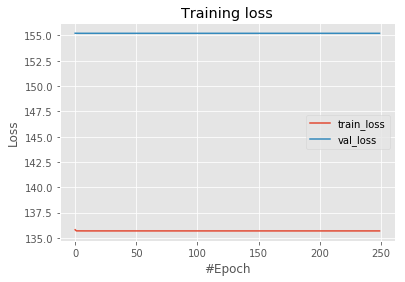

In [5]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="sigmoid")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,250), history.history["loss"], label="train_loss")
plt.plot(np.arange(0,250), history.history["val_loss"], label="val_loss")
plt.title("Training loss")
plt.xlabel("#Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [5]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
score = model.evaluate(X_test_scaled, y_test_scaled)
print("\n Loss: %.3f \t:" %(score))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 2s 224us/step - loss: nan - val_loss: nan
Epoch 2/250
9745/9745 [==============================] - 2s 215us/step - loss: nan - val_loss: nan
Epoch 3/250
9745/9745 [==============================] - 2s 215us/step - loss: nan - val_loss: nan
Epoch 4/250
9745/9745 [==============================] - 2s 222us/step - loss: nan - val_loss: nan
Epoch 5/250
9745/9745 [==============================] - 2s 219us/step - loss: nan - val_loss: nan
Epoch 6/250
9745/9745 [==============================] - 2s 239us/step - loss: nan - val_loss: nan
Epoch 7/250
9745/9745 [==============================] - 2s 246us/step - loss: nan - val_loss: nan
Epoch 8/250
9745/9745 [==============================] - 2s 238us/step - loss: nan - val_loss: nan
Epoch 9/250
9745/9745 [==============================] - 2s 220us/step - loss: nan - val_loss: nan
Epoch 10/250
9745/9745 [==============================] - 2s 

9745/9745 [==============================] - 2s 223us/step - loss: nan - val_loss: nan
Epoch 164/250
9745/9745 [==============================] - 2s 208us/step - loss: nan - val_loss: nan
Epoch 165/250
9745/9745 [==============================] - 2s 207us/step - loss: nan - val_loss: nan
Epoch 166/250
9745/9745 [==============================] - 2s 208us/step - loss: nan - val_loss: nan
Epoch 167/250
9745/9745 [==============================] - 2s 207us/step - loss: nan - val_loss: nan
Epoch 168/250
9745/9745 [==============================] - 2s 211us/step - loss: nan - val_loss: nan
Epoch 169/250
9745/9745 [==============================] - 2s 238us/step - loss: nan - val_loss: nan
Epoch 170/250
9745/9745 [==============================] - 2s 234us/step - loss: nan - val_loss: nan
Epoch 171/250
9745/9745 [==============================] - 2s 209us/step - loss: nan - val_loss: nan
Epoch 172/250
9745/9745 [==============================] - 2s 214us/step - loss: nan - val_loss: nan
Epoc